In [1]:
%pip install matplotlib
%pip install seaborn
%pip install scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

import seaborn as sns

import scipy
import pylab

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv("data/merged-data.csv")
names = pd.read_csv("data/genes-to-get.csv")
df_c = pd.read_csv("data/merged-control-data.csv")
names_c = pd.read_csv("data/scg-controls.csv")

In [4]:
df = df.merge(names[['symbol', 'organism', 'gene_full_name']], left_on='gene', right_on='symbol', how='left')
df['name'] = df[['symbol', 'organism', 'gene_full_name']].agg('-'.join, axis=1)

df_c = df_c.merge(names_c[['symbol', 'organism', 'gene_full_name']], left_on='gene', right_on='symbol', how='left')
df_c['name'] = df_c[['symbol', 'organism', 'gene_full_name']].agg('-'.join, axis=1)

In [5]:
df.head()

,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth,symbol,organism,gene_full_name,name
0,k119_38397_2,SRR5650060,NP_417533.1,UC,8599308,900.0,81.0,5.0,76.0,900.0,8.34,NP_417533.1,Escherichia,L(+)-tartrate dehydratase subunit alpha,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...
1,k119_60203_75,SRR6468687,AAL19701.1,nonIBD,48956407,846.0,414.0,36.0,378.0,846.0,45.05,AAL19701.1,Salmonella,"fumarate hydratase, alpha subunit","AAL19701.1-Salmonella-fumarate hydratase, alph..."
2,k119_155032_2,SRR6468687,AAL19701.1,nonIBD,48956407,843.0,104.0,24.0,80.0,843.0,10.41,AAL19701.1,Salmonella,"fumarate hydratase, alpha subunit","AAL19701.1-Salmonella-fumarate hydratase, alph..."
3,NaN,SRR1212289,AAL19700.1,CD,1685562,0.0,0.0,0.0,0.0,0.0,0.00,AAL19700.1,Salmonella,Tartrate dehydratase beta subunit/Fumarate hyd...,AAL19700.1-Salmonella-Tartrate dehydratase bet...
4,k119_50313_4,SRR2145382,NP_417533.1,nonIBD,6515322,900.0,146.0,42.0,104.0,900.0,13.82,NP_417533.1,Escherichia,L(+)-tartrate dehydratase subunit alpha,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...


In [6]:
df_c.head()

,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth,symbol,organism,gene_full_name,name
0,NaN,ERR011265,NP_417778.1,nonIBD,11684574,0.0,0.0,0.0,0.0,0.0,0.00,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...
1,k119_3900_3,SRR2145375,NP_417635.1,nonIBD,13713609,930.0,74.0,18.0,56.0,930.0,7.64,NP_417635.1,Escherichia,tRNA pseudouridine synthase,NP_417635.1-Escherichia-tRNA pseudouridine syn...
2,NaN,SRR6468714,NP_417762.1,UC,10753164,0.0,0.0,0.0,0.0,0.0,0.00,NP_417762.1,Escherichia,30S ribosomal subunit protein S5,NP_417762.1-Escherichia-30S ribosomal subunit ...
3,NaN,ERR011173,YP_026260.1,nonIBD,12373439,0.0,0.0,0.0,0.0,0.0,0.00,YP_026260.1,Escherichia,Porphobilinogen deaminase,YP_026260.1-Escherichia-Porphobilinogen deaminase
4,k119_67485_2,SRR6468634,NP_417780.1,UC,16121658,312.0,34.0,10.0,24.0,312.0,8.99,NP_417780.1,Escherichia,ribosomal protein S10 rpsJ,NP_417780.1-Escherichia-ribosomal protein S10 ...


In [7]:
one_scg = df_c.loc[df_c['gene'] == 'NP_417778.1']

In [8]:
pd.concat([df, one_scg], ignore_index=True)

,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth,symbol,organism,gene_full_name,name
0,k119_38397_2,SRR5650060,NP_417533.1,UC,8599308,900.0,81.0,5.0,76.0,900.0,8.34,NP_417533.1,Escherichia,L(+)-tartrate dehydratase subunit alpha,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...
1,k119_60203_75,SRR6468687,AAL19701.1,nonIBD,48956407,846.0,414.0,36.0,378.0,846.0,45.05,AAL19701.1,Salmonella,"fumarate hydratase, alpha subunit","AAL19701.1-Salmonella-fumarate hydratase, alph..."
2,k119_155032_2,SRR6468687,AAL19701.1,nonIBD,48956407,843.0,104.0,24.0,80.0,843.0,10.41,AAL19701.1,Salmonella,"fumarate hydratase, alpha subunit","AAL19701.1-Salmonella-fumarate hydratase, alph..."
3,NaN,SRR1212289,AAL19700.1,CD,1685562,0.0,0.0,0.0,0.0,0.0,0.00,AAL19700.1,Salmonella,Tartrate dehydratase beta subunit/Fumarate hyd...,AAL19700.1-Salmonella-Tartrate dehydratase bet...
4,k119_50313_4,SRR2145382,NP_417533.1,nonIBD,6515322,900.0,146.0,42.0,104.0,900.0,13.82,NP_417533.1,Escherichia,L(+)-tartrate dehydratase subunit alpha,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12849,k119_13958_6,SRR6468509,NP_417778.1,UC,13209912,621.0,80.0,4.0,76.0,621.0,11.93,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...
12850,NaN,SRR1212821,NP_417778.1,CD,1568867,0.0,0.0,0.0,0.0,0.0,0.00,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...
12851,NaN,SRR1215917,NP_417778.1,CD,1434412,0.0,0.0,0.0,0.0,0.0,0.00,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...
12852,k119_4461_3,SRR1213913,NP_417778.1,nonIBD,2371423,606.0,49.0,1.0,48.0,606.0,7.40,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...


In [9]:
df_simple = df.copy()

df_simple['diagnosis'] = df_simple['diagnosis'].str.lower().replace({'cd': 'IBD', 'uc': 'IBD', 'nonibd': 'Control'})

df_simple['mapped_norm_by_read_count'] = df_simple['mapped']/df_simple['read_count'] * 1000000

df_simple['mapped_norm_by_contig_length'] = 0.0
df_simple.loc[df_simple['length'] > 0, 'mapped_norm_by_contig_length'] = (
    (df_simple.loc[df_simple['length'] > 0, 'mapped'] / df_simple.loc[df_simple['length'] > 0, 'length']) * 1000
)

df_simple['mapped_norm_by_read_count_and_contig_length'] = 0.0
df_simple.loc[df_simple['length'] > 0, 'mapped_norm_by_read_count_and_contig_length'] = (
    (df_simple.loc[df_simple['length'] > 0, 'mapped_norm_by_read_count'] / df_simple.loc[df_simple['length'] > 0, 'length']) * 1000
)

df_simple['log_map_norm'] = np.log2(df_simple['mapped_norm_by_read_count_and_contig_length'])

In [10]:
df_simple.head()

,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth,symbol,organism,gene_full_name,name,mapped_norm_by_read_count,mapped_norm_by_contig_length,mapped_norm_by_read_count_and_contig_length,log_map_norm
0,k119_38397_2,SRR5650060,NP_417533.1,IBD,8599308,900.0,81.0,5.0,76.0,900.0,8.34,NP_417533.1,Escherichia,L(+)-tartrate dehydratase subunit alpha,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,9.419363,90.000000,10.465958,3.387633
1,k119_60203_75,SRR6468687,AAL19701.1,Control,48956407,846.0,414.0,36.0,378.0,846.0,45.05,AAL19701.1,Salmonella,"fumarate hydratase, alpha subunit","AAL19701.1-Salmonella-fumarate hydratase, alph...",8.456503,489.361702,9.995866,3.321332
2,k119_155032_2,SRR6468687,AAL19701.1,Control,48956407,843.0,104.0,24.0,80.0,843.0,10.41,AAL19701.1,Salmonella,"fumarate hydratase, alpha subunit","AAL19701.1-Salmonella-fumarate hydratase, alph...",2.124339,123.368921,2.519975,1.333409
3,NaN,SRR1212289,AAL19700.1,IBD,1685562,0.0,0.0,0.0,0.0,0.0,0.00,AAL19700.1,Salmonella,Tartrate dehydratase beta subunit/Fumarate hyd...,AAL19700.1-Salmonella-Tartrate dehydratase bet...,0.000000,0.000000,0.000000,-inf
4,k119_50313_4,SRR2145382,NP_417533.1,Control,6515322,900.0,146.0,42.0,104.0,900.0,13.82,NP_417533.1,Escherichia,L(+)-tartrate dehydratase subunit alpha,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,22.408716,162.222222,24.898573,4.637991


In [11]:
print('Number of samples for each diagnosis')
df_simple.groupby(['diagnosis'])['run'].nunique()

Number of samples for each diagnosis


diagnosis
Control    372
IBD        687
Name: run, dtype: int64

In [12]:
print('Subsetting the dataframe by the number of controls to give an even weight to the study...?')
sample_counts = df_simple.groupby('run').first().reset_index()
print(sample_counts.head())

control = sample_counts[sample_counts['diagnosis'] == 'Control']['run']
n = len(control)
print("Using", n, 'case samples')

case = sample_counts[sample_counts['diagnosis'] == 'IBD']['run'].sample(n=n, random_state=42) # random_state is a seed for reproducing the dataset again
print(case.head())
df_subset = df_simple[df_simple['run'].isin(control.tolist() + case.tolist())]

Subsetting the dataframe by the number of controls to give an even weight to the study...?
         run        contig         gene diagnosis  read_count  length  mapped  \
0  ERR011087          None  NP_462264.1   Control    11640976     0.0     0.0   
1  ERR011088          None  NP_459742.1   Control    10868175     0.0     0.0   
2  ERR011089  k79_21932_13   AAL19700.1   Control     4190512     0.0     0.0   
3  ERR011090  k79_36202_12   AAA60327.1   Control    11169067     0.0     0.0   
4  ERR011091   k79_14635_6  NP_459742.1   Control     7928489     0.0     0.0   

   unmapped  net_mapped  length_right  average_depth       symbol  \
0       0.0         0.0           0.0            0.0  NP_462264.1   
1       0.0         0.0           0.0            0.0  NP_459742.1   
2       0.0         0.0           0.0            0.0   AAL19700.1   
3       0.0         0.0           0.0            0.0   AAA60327.1   
4       0.0         0.0           0.0            0.0  NP_459742.1   

      o

In [13]:
print('Number of samples for each diagnosis')
df_subset.groupby(['diagnosis'])['run'].nunique()

Number of samples for each diagnosis


diagnosis
Control    372
IBD        372
Name: run, dtype: int64

In [14]:
df_scg = one_scg.copy()

df_scg['diagnosis'] = df_scg['diagnosis'].str.lower().replace({'cd': 'IBD', 'uc': 'IBD', 'nonibd': 'Control'})

df_scg['mapped_norm_by_read_count'] = df_scg['mapped']/df_scg['read_count'] * 1000000

df_scg['mapped_norm_by_contig_length'] = 0.0
df_scg.loc[df_scg['length'] > 0, 'mapped_norm_by_contig_length'] = (
    (df_scg.loc[df_scg['length'] > 0, 'mapped'] / df_scg.loc[df_scg['length'] > 0, 'length']) * 1000
)

df_scg['mapped_norm_by_read_count_and_contig_length'] = 0.0
df_scg.loc[df_scg['length'] > 0, 'mapped_norm_by_read_count_and_contig_length'] = (
    (df_scg.loc[df_scg['length'] > 0, 'mapped_norm_by_read_count'] / df_scg.loc[df_scg['length'] > 0, 'length']) * 1000
)

df_scg['log_map_norm'] = np.log2(df_scg['mapped_norm_by_read_count_and_contig_length'])

In [15]:
df_scg.head()

,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth,symbol,organism,gene_full_name,name,mapped_norm_by_read_count,mapped_norm_by_contig_length,mapped_norm_by_read_count_and_contig_length,log_map_norm
0,NaN,ERR011265,NP_417778.1,Control,11684574,0.0,0.0,0.0,0.0,0.0,0.00,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...,0.000000,0.000000,0.000000,-inf
27,NaN,SRR1765653,NP_417778.1,IBD,2956965,0.0,0.0,0.0,0.0,0.0,0.00,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...,0.000000,0.000000,0.000000,-inf
225,NaN,ERR011348,NP_417778.1,Control,10703567,0.0,0.0,0.0,0.0,0.0,0.00,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...,0.000000,0.000000,0.000000,-inf
337,k119_65006_2,SRR6468651,NP_417778.1,IBD,12708046,606.0,60.0,14.0,46.0,606.0,9.36,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...,4.721418,99.009901,7.791119,2.961831
392,NaN,ERR011319,NP_417778.1,Control,10113460,0.0,0.0,0.0,0.0,0.0,0.00,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...,0.000000,0.000000,0.000000,-inf


In [16]:
#df_fin = pd.concat([df_simple, df_scg], ignore_index=True)
#df_fin

In [17]:
df_scg_subset = df_scg[df_scg['run'].isin(control.tolist() + case.tolist())]

In [18]:
print('Number of samples for each diagnosis')
df_scg_subset.groupby(['diagnosis'])['run'].nunique()

Number of samples for each diagnosis


diagnosis
Control    372
IBD        372
Name: run, dtype: int64

In [19]:
df_fin = pd.concat([df_subset, df_scg_subset], ignore_index=True)
df_fin

,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth,symbol,organism,gene_full_name,name,mapped_norm_by_read_count,mapped_norm_by_contig_length,mapped_norm_by_read_count_and_contig_length,log_map_norm
0,k119_38397_2,SRR5650060,NP_417533.1,IBD,8599308,900.0,81.0,5.0,76.0,900.0,8.34,NP_417533.1,Escherichia,L(+)-tartrate dehydratase subunit alpha,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,9.419363,90.000000,10.465958,3.387633
1,k119_60203_75,SRR6468687,AAL19701.1,Control,48956407,846.0,414.0,36.0,378.0,846.0,45.05,AAL19701.1,Salmonella,"fumarate hydratase, alpha subunit","AAL19701.1-Salmonella-fumarate hydratase, alph...",8.456503,489.361702,9.995866,3.321332
2,k119_155032_2,SRR6468687,AAL19701.1,Control,48956407,843.0,104.0,24.0,80.0,843.0,10.41,AAL19701.1,Salmonella,"fumarate hydratase, alpha subunit","AAL19701.1-Salmonella-fumarate hydratase, alph...",2.124339,123.368921,2.519975,1.333409
3,NaN,SRR1212289,AAL19700.1,IBD,1685562,0.0,0.0,0.0,0.0,0.0,0.00,AAL19700.1,Salmonella,Tartrate dehydratase beta subunit/Fumarate hyd...,AAL19700.1-Salmonella-Tartrate dehydratase bet...,0.000000,0.000000,0.000000,-inf
4,k119_50313_4,SRR2145382,NP_417533.1,Control,6515322,900.0,146.0,42.0,104.0,900.0,13.82,NP_417533.1,Escherichia,L(+)-tartrate dehydratase subunit alpha,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,22.408716,162.222222,24.898573,4.637991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8825,k119_48115_6,SRR6468509,NP_417778.1,IBD,13209912,606.0,67.0,9.0,58.0,606.0,10.43,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...,5.071949,110.561056,8.369553,3.065151
8826,k119_13958_6,SRR6468509,NP_417778.1,IBD,13209912,621.0,80.0,4.0,76.0,621.0,11.93,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...,6.056059,128.824477,9.752107,3.285714
8827,NaN,SRR1215917,NP_417778.1,IBD,1434412,0.0,0.0,0.0,0.0,0.0,0.00,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...,0.000000,0.000000,0.000000,-inf
8828,k119_4461_3,SRR1213913,NP_417778.1,Control,2371423,606.0,49.0,1.0,48.0,606.0,7.40,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...,20.662699,80.858086,34.096863,5.091567


In [92]:
df_fin.groupby(['diagnosis'])['run'].nunique()

diagnosis
Control    372
IBD        372
Name: run, dtype: int64

In [60]:
df_fin[(df_fin['run'] == 'SRR6468509') & (df_fin['gene'] == 'NP_417778.1')]

,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth,symbol,organism,gene_full_name,name,mapped_norm_by_read_count,mapped_norm_by_contig_length,mapped_norm_by_read_count_and_contig_length,log_map_norm
8825,k119_48115_6,SRR6468509,NP_417778.1,IBD,13209912,606.0,67.0,9.0,58.0,606.0,10.43,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...,5.071949,110.561056,8.369553,3.065151
8826,k119_13958_6,SRR6468509,NP_417778.1,IBD,13209912,621.0,80.0,4.0,76.0,621.0,11.93,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...,6.056059,128.824477,9.752107,3.285714


In [93]:
long_table = (
    df_fin
    .groupby(['run', 'name', 'diagnosis'])['log_map_norm']
    .sum()
    .reset_index()
)
long_table[long_table['run'] == 'SRR6468509']

,run,name,diagnosis,log_map_norm
6070,SRR6468509,AAA60327.1-Pseudomonas-tartrate dehydrogenase,IBD,-inf
6071,SRR6468509,AAL19700.1-Salmonella-Tartrate dehydratase bet...,IBD,5.529491
6072,SRR6468509,"AAL19701.1-Salmonella-fumarate hydratase, alph...",IBD,2.770774
6073,SRR6468509,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,IBD,5.749219
6074,SRR6468509,NP_417534.1-Escherichia-L(+)-tartrate dehydrat...,IBD,2.225934
6075,SRR6468509,NP_417778.1-Escherichia-50S ribosomal subunit ...,IBD,6.350865
6076,SRR6468509,NP_459741.1-Salmonella-Tartrate dehydratase be...,IBD,5.529491
6077,SRR6468509,"NP_459742.1-Salmonella-fumarate hydratase, alp...",IBD,2.770774
6078,SRR6468509,NP_462264.1-Salmonella-L(+)-tartrate dehydrata...,IBD,3.271842
6079,SRR6468509,NP_462265.1-Salmonella-tartrate dehydratase su...,IBD,-inf


In [94]:
long_table.groupby(['diagnosis'])['run'].nunique()

diagnosis
Control    372
IBD        372
Name: run, dtype: int64

In [97]:
long_table_inf_zero = long_table.copy()
long_table_inf_zero['log_map_norm'] = long_table_inf_zero['log_map_norm'].replace(-np.inf, 0)
long_table_inf_zero.groupby(['diagnosis'])['run'].nunique()

diagnosis
Control    372
IBD        372
Name: run, dtype: int64

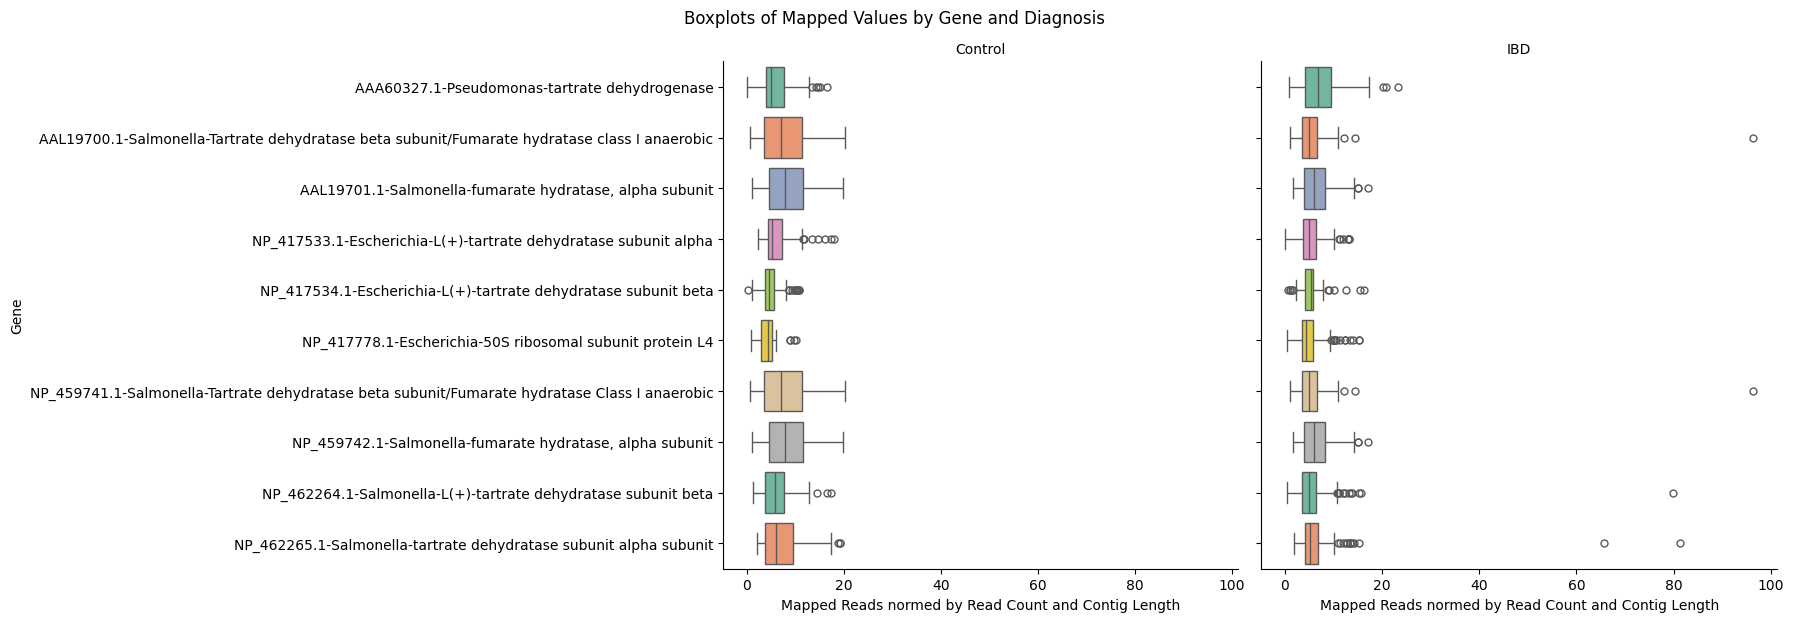

In [21]:
# While the distribution seems to show an increase in genes 
p = sns.catplot(
    data=long_table,
    x="log_map_norm",
    y="name",
    hue="name", 
    kind="box",
    col="diagnosis",
    palette="Set2",
    height=6,
    aspect=1.5
)
p.set_titles(col_template="{col_name}")
p.set_xlabels("Mapped Reads normed by Read Count and Contig Length")
p.set_ylabels("Gene")

plt.suptitle("Boxplots of Mapped Values by Gene and Diagnosis", y=1.03)
plt.show()

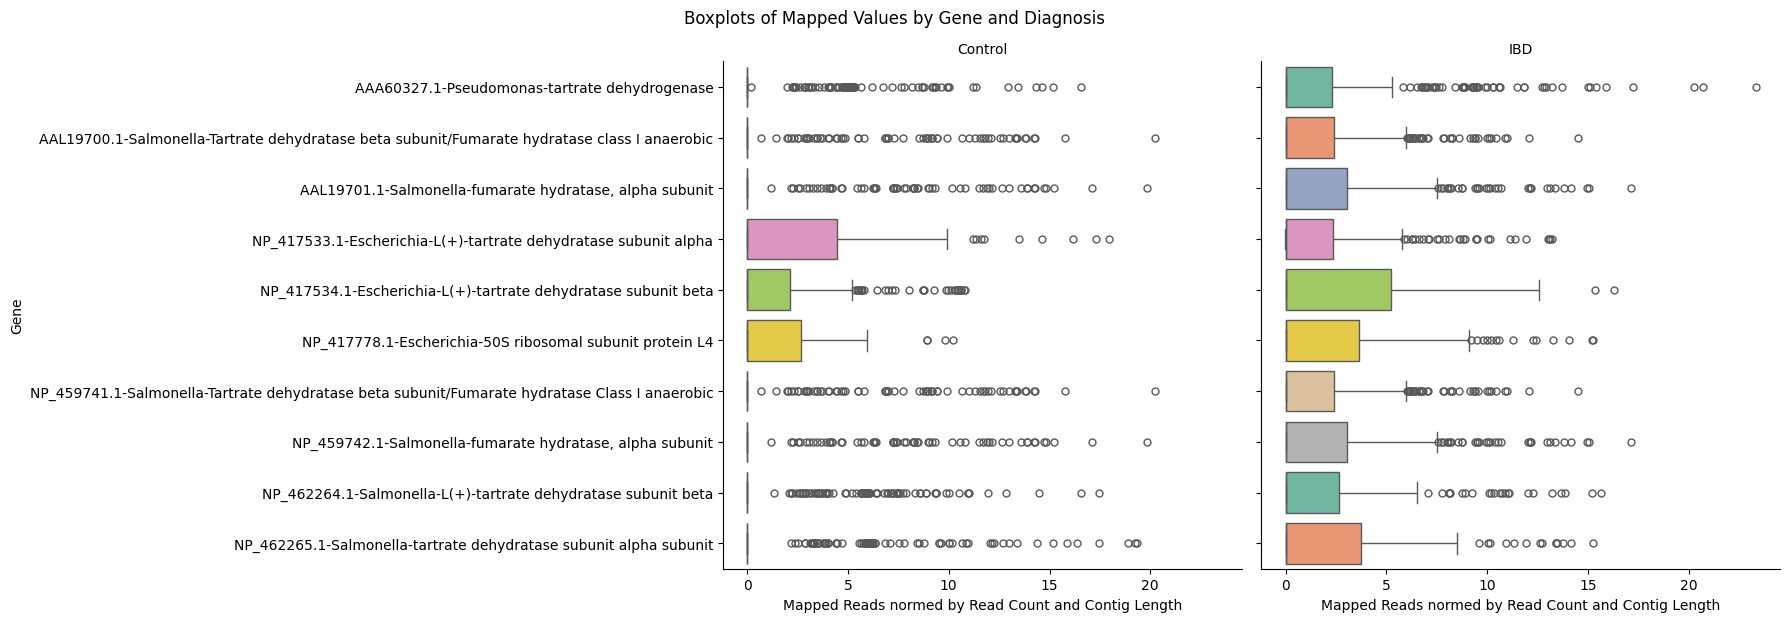

In [72]:
# While the distribution seems to show an increase in genes 
p = sns.catplot(
    data=long_table_inf_zero[long_table_inf_zero['log_map_norm'] < 30], #remove outliers? Use `long_table_inf_zero` for full range
    x="log_map_norm",
    y="name",
    hue="name", 
    kind="box",
    col="diagnosis",
    palette="Set2",
    height=6,
    aspect=1.5,
)
p.set_titles(col_template="{col_name}")
p.set_xlabels("Mapped Reads normed by Read Count and Contig Length")
p.set_ylabels("Gene")

plt.suptitle("Boxplots of Mapped Values by Gene and Diagnosis", y=1.03)
plt.show()

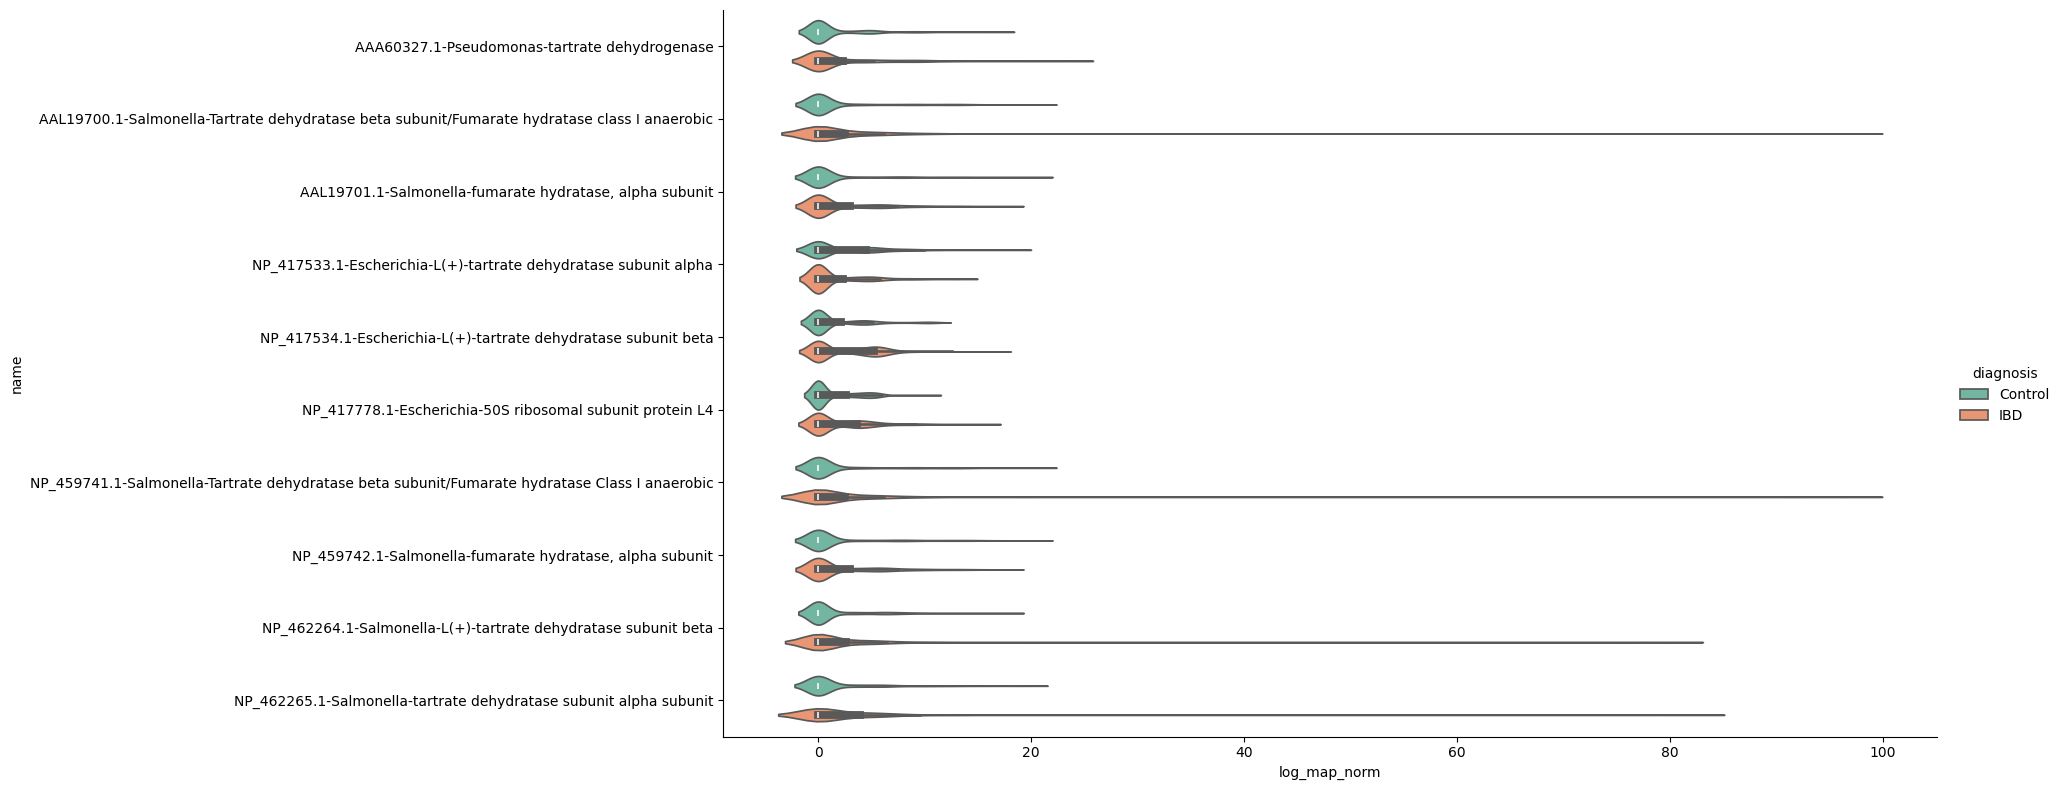

In [64]:
sns.catplot(
    data=long_table_inf_zero,
    x="log_map_norm",
    y="name",
    hue="diagnosis",
    kind="violin",
    palette="Set2",
    height=8,
    aspect=2.5
)

#plt.savefig('coverage_violin.png', dpi=300, bbox_inches='tight')
plt.show()

In [35]:
#long_table_no_inf = long_table[long_table['log_map_norm'] != -np.inf]

mean_depth_no_inf = long_table_inf_zero.groupby(['name', 'diagnosis'])['log_map_norm'].mean().reset_index(name='mean_depth')
print(mean_depth_no_inf)

                                                 name diagnosis  mean_depth
0       AAA60327.1-Pseudomonas-tartrate dehydrogenase   Control    1.380484
1       AAA60327.1-Pseudomonas-tartrate dehydrogenase       IBD    1.985819
2   AAL19700.1-Salmonella-Tartrate dehydratase bet...   Control    1.365617
3   AAL19700.1-Salmonella-Tartrate dehydratase bet...       IBD    1.733584
4   AAL19701.1-Salmonella-fumarate hydratase, alph...   Control    1.378909
5   AAL19701.1-Salmonella-fumarate hydratase, alph...       IBD    1.874812
6   NP_417533.1-Escherichia-L(+)-tartrate dehydrat...   Control    2.190390
7   NP_417533.1-Escherichia-L(+)-tartrate dehydrat...       IBD    1.467503
8   NP_417534.1-Escherichia-L(+)-tartrate dehydrat...   Control    1.372255
9   NP_417534.1-Escherichia-L(+)-tartrate dehydrat...       IBD    2.344337
10  NP_417778.1-Escherichia-50S ribosomal subunit ...   Control    1.297580
11  NP_417778.1-Escherichia-50S ribosomal subunit ...       IBD    1.981550
12  NP_45974

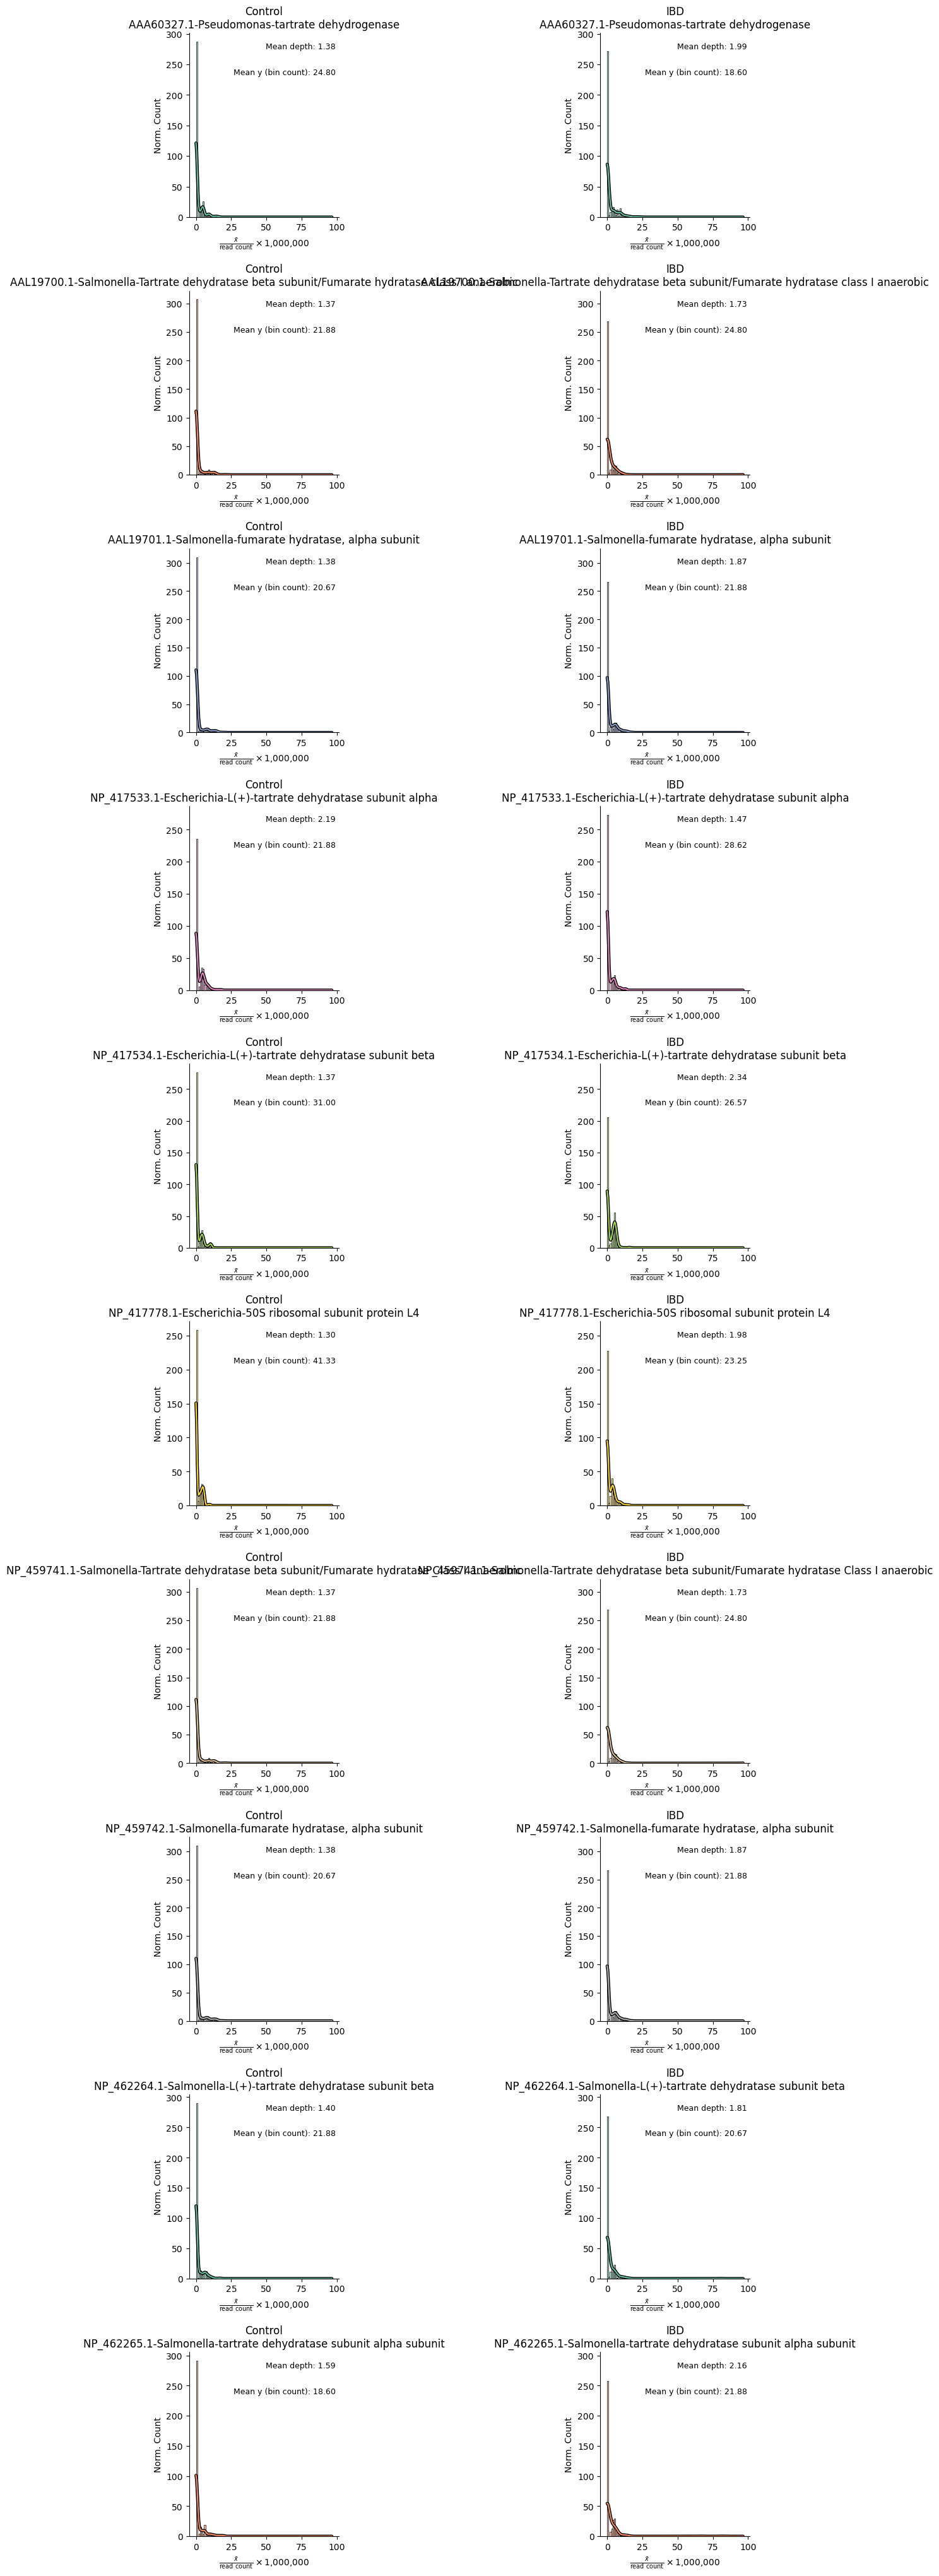

In [65]:
p = sns.displot(
    data=long_table_inf_zero,
    x="log_map_norm",
    hue="name",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    col='diagnosis',
    row='name',
    kde=True,
    #weights="weight",  # normalize using weights
    facet_kws={'sharey': False, 'sharex': False} # sharex must be false to label the x axis!
)

latex_xlabel = r'$\frac{\bar{x}}{\mathrm{read\ count}} \times 1{,}000{,}000$'
row_names = p.row_names

# Loop through each row and align y-limits
for row_idx, row_name in enumerate(row_names):
    # Get all axes in this row
    axes_row = p.axes[row_idx, :]
    
    # Find max y-limit in this row
    max_ylim = max(ax.get_ylim()[1] for ax in axes_row)
    
    # Set uniform y-limit across this row
    for ax in axes_row:
        ax.set_ylim(top=max_ylim)
        ax.set_ylabel("Norm. Count")

for ax in p.axes.flatten():
# Iterate over each Axes in the FacetGrid to customize KDE lines and bar edges
#for ax in p.axes.flatten():
    lines = [line for line in ax.lines if line.get_linestyle() == '-']
    
    # For each existing KDE line, add a black thicker line underneath it
    for line in lines:
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # Plot black thicker line underneath
        ax.plot(
            xdata, ydata,
            color='black',
            linewidth=line.get_linewidth() + 2,  # thicker than original
            solid_capstyle='round',
            zorder=line.get_zorder() - 1  # behind original colored line
        )

    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(0.5)

    # Get the bar heights (i.e., counts in each bin)
    bin_counts = [patch.get_height() for patch in ax.patches if patch.get_height() > 0]
    
    # Compute mean of the bin heights (mean y-value)
    mean_con = sum(bin_counts) / len(bin_counts) if bin_counts else 0

#for ax in p.axes.flatten():
    # Get gene and diagnosis from facet title
    title = ax.get_title()
    try:
        name = title.split('|')[0].split('=')[1].strip()
        diagnosis = title.split('|')[1].split('=')[1].strip()
    except IndexError:
        continue  # skip if title parsing fails
    
    # Get the mean value for this facet
    row = mean_depth_no_inf[(mean_depth_no_inf['name'] == name) & (mean_depth_no_inf['diagnosis'] == diagnosis)]
    if not row.empty:
        mean_dep = row['mean_depth'].values[0]
        ax.text(
            0.98, 0.95,
            f"Mean depth: {mean_dep:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )
        ax.text(
            0.98, 0.81,  # Lower position to stack nicely
            f"Mean y (bin count): {mean_con:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )


    ax.set_title(f'{diagnosis}\n{name}')
    ax.tick_params(labelbottom=True)
    ax.set_xlabel(latex_xlabel)

p._legend.remove()
p.fig.subplots_adjust(hspace=0.4, wspace=1.75, bottom=0.20)  # add space for x axis

#plt.savefig('norm_coverage_count_distribution.png', dpi=200, bbox_inches='tight')
plt.show()

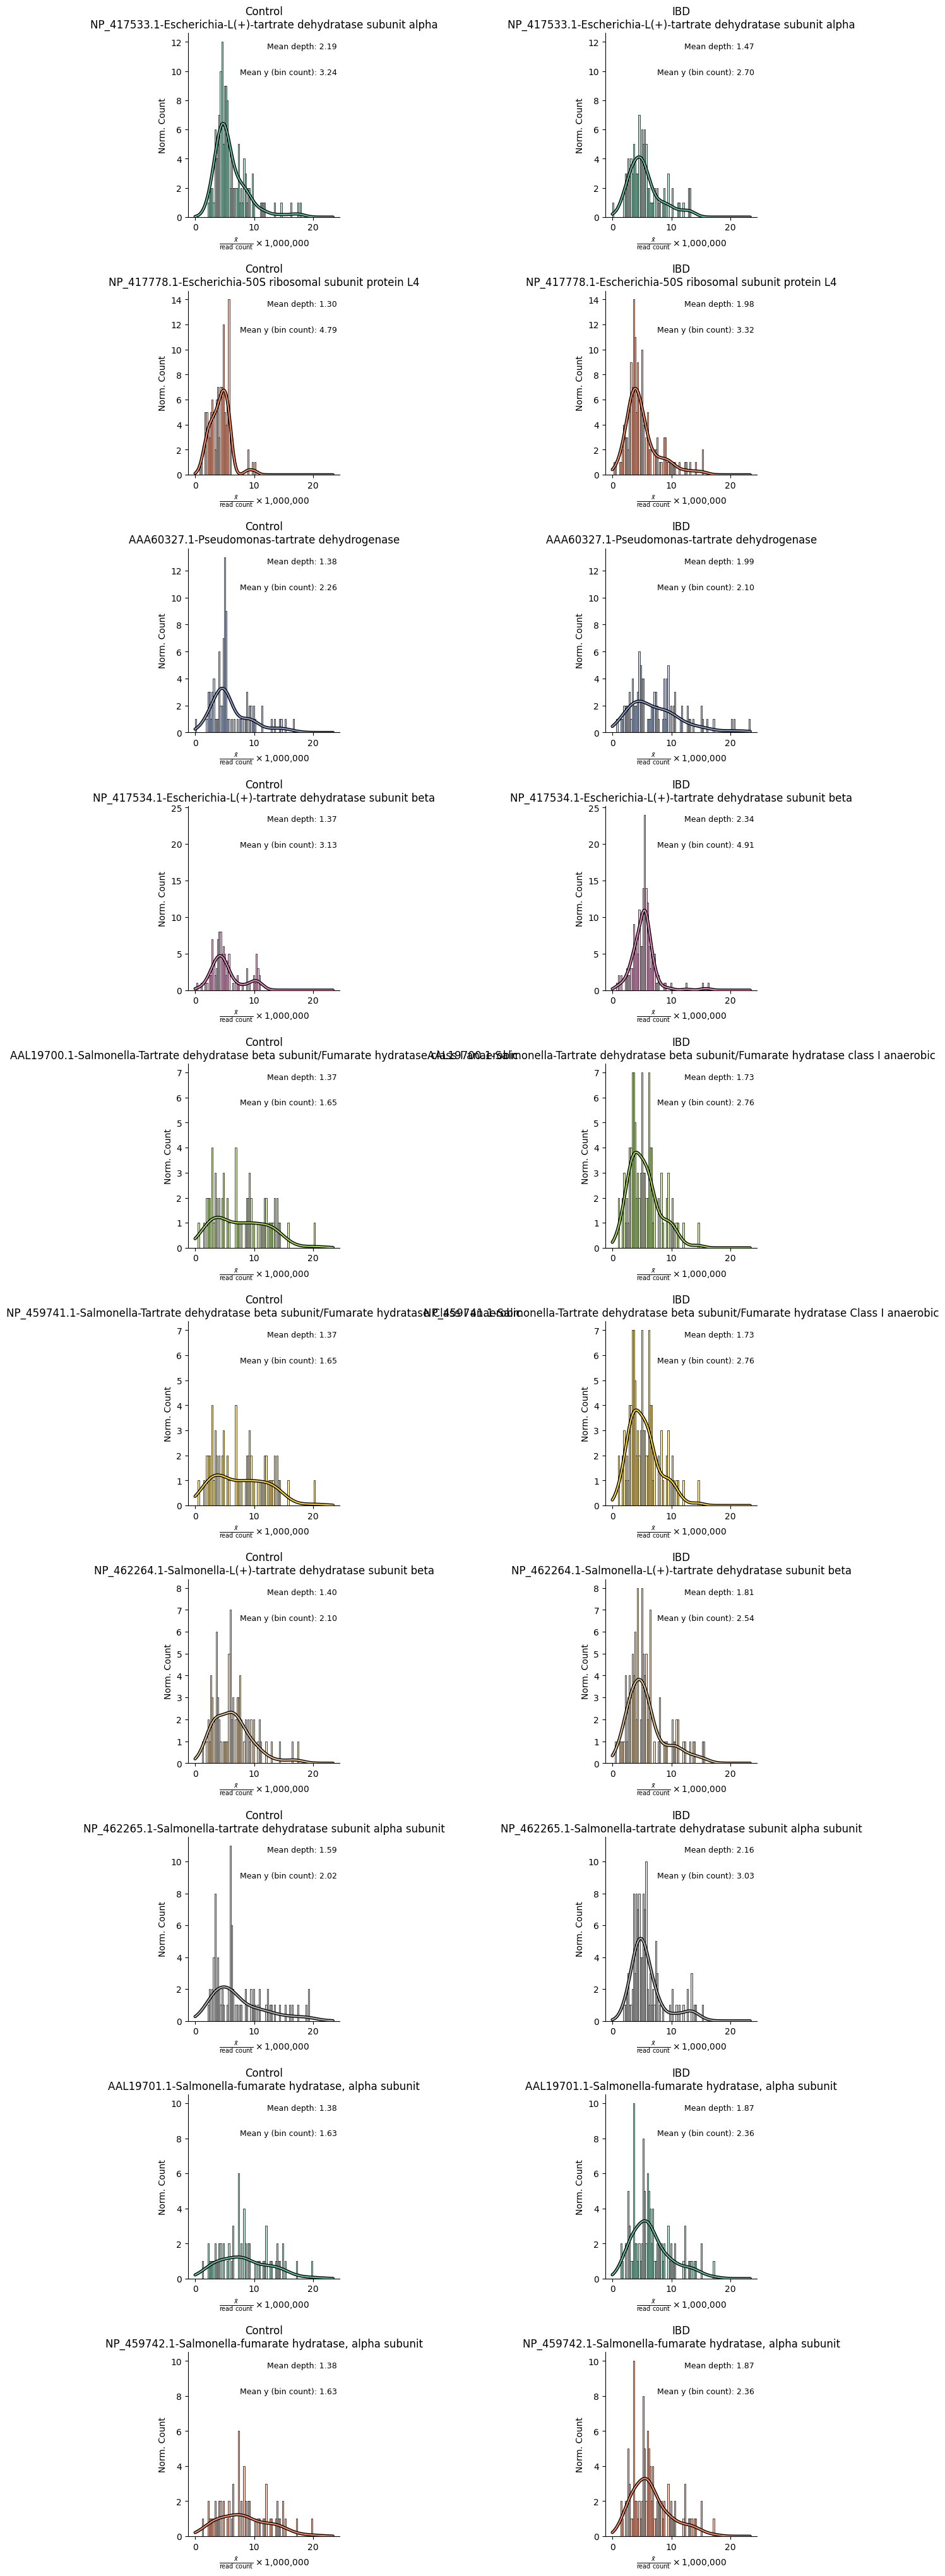

In [74]:
p = sns.displot(
    data=long_table_inf_zero[(long_table_inf_zero['log_map_norm'] < 30) & long_table_inf_zero['log_map_norm'] != 0], # long_table_inf_zero[long_table_inf_zero['log_map_norm'] < 30]
    x="log_map_norm",
    hue="name",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    col='diagnosis',
    row='name',
    kde=True,
    #weights="weight",  # normalize using weights
    facet_kws={'sharey': False, 'sharex': False} # sharex must be false to label the x axis!
)

latex_xlabel = r'$\frac{\bar{x}}{\mathrm{read\ count}} \times 1{,}000{,}000$'
row_names = p.row_names

# Loop through each row and align y-limits
for row_idx, row_name in enumerate(row_names):
    # Get all axes in this row
    axes_row = p.axes[row_idx, :]
    
    # Find max y-limit in this row
    max_ylim = max(ax.get_ylim()[1] for ax in axes_row)
    
    # Set uniform y-limit across this row
    for ax in axes_row:
        ax.set_ylim(top=max_ylim)
        ax.set_ylabel("Norm. Count")

for ax in p.axes.flatten():
# Iterate over each Axes in the FacetGrid to customize KDE lines and bar edges
#for ax in p.axes.flatten():
    lines = [line for line in ax.lines if line.get_linestyle() == '-']
    
    # For each existing KDE line, add a black thicker line underneath it
    for line in lines:
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # Plot black thicker line underneath
        ax.plot(
            xdata, ydata,
            color='black',
            linewidth=line.get_linewidth() + 2,  # thicker than original
            solid_capstyle='round',
            zorder=line.get_zorder() - 1  # behind original colored line
        )

    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(0.5)

    # Get the bar heights (i.e., counts in each bin)
    bin_counts = [patch.get_height() for patch in ax.patches if patch.get_height() > 0]
    
    # Compute mean of the bin heights (mean y-value)
    mean_con = sum(bin_counts) / len(bin_counts) if bin_counts else 0

#for ax in p.axes.flatten():
    # Get gene and diagnosis from facet title
    title = ax.get_title()
    try:
        name = title.split('|')[0].split('=')[1].strip()
        diagnosis = title.split('|')[1].split('=')[1].strip()
    except IndexError:
        continue  # skip if title parsing fails
    
    # Get the mean value for this facet
    row = mean_depth_no_inf[(mean_depth_no_inf['name'] == name) & (mean_depth_no_inf['diagnosis'] == diagnosis)]
    if not row.empty:
        mean_dep = row['mean_depth'].values[0]
        ax.text(
            0.98, 0.95,
            f"Mean depth: {mean_dep:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )
        ax.text(
            0.98, 0.81,  # Lower position to stack nicely
            f"Mean y (bin count): {mean_con:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )


    ax.set_title(f'{diagnosis}\n{name}')
    ax.tick_params(labelbottom=True)
    ax.set_xlabel(latex_xlabel)

p._legend.remove()
p.fig.subplots_adjust(hspace=0.4, wspace=1.75, bottom=0.20)  # add space for x axis

#plt.savefig('norm_coverage_count_distribution.png', dpi=200, bbox_inches='tight')
plt.show()

In [98]:
long_table_simple = (
    df_subset
    .groupby(['run', 'name', 'diagnosis'])['log_map_norm']
    .sum()
    .reset_index()
)
long_table_simple_no_inf = long_table_simple.copy()
long_table_simple_no_inf['log_map_norm'] = long_table_simple_no_inf['log_map_norm'].replace(-np.inf, 0)

long_table_simple_no_inf

,run,name,diagnosis,log_map_norm
0,ERR011087,AAA60327.1-Pseudomonas-tartrate dehydrogenase,Control,0.000000
1,ERR011087,AAL19700.1-Salmonella-Tartrate dehydratase bet...,Control,0.000000
2,ERR011087,"AAL19701.1-Salmonella-fumarate hydratase, alph...",Control,0.000000
3,ERR011087,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,Control,0.000000
4,ERR011087,NP_417534.1-Escherichia-L(+)-tartrate dehydrat...,Control,0.000000
...,...,...,...,...
6691,SRR6468718,NP_417534.1-Escherichia-L(+)-tartrate dehydrat...,IBD,0.000000
6692,SRR6468718,NP_459741.1-Salmonella-Tartrate dehydratase be...,IBD,3.455238
6693,SRR6468718,"NP_459742.1-Salmonella-fumarate hydratase, alp...",IBD,5.961762
6694,SRR6468718,NP_462264.1-Salmonella-L(+)-tartrate dehydrata...,IBD,5.012216


In [99]:
long_table_scg = (
    df_scg_subset
    .groupby(['run', 'name', 'diagnosis'])['log_map_norm']
    .sum()
    .reset_index()
)
long_table_scg_no_inf = long_table_scg.copy()
long_table_scg_no_inf['log_map_norm'] = long_table_scg_no_inf['log_map_norm'].replace(-np.inf, 0)

long_table_scg_no_inf

,run,name,diagnosis,log_map_norm
0,ERR011087,NP_417778.1-Escherichia-50S ribosomal subunit ...,Control,0.0
1,ERR011088,NP_417778.1-Escherichia-50S ribosomal subunit ...,Control,0.0
2,ERR011089,NP_417778.1-Escherichia-50S ribosomal subunit ...,Control,0.0
3,ERR011090,NP_417778.1-Escherichia-50S ribosomal subunit ...,Control,0.0
4,ERR011091,NP_417778.1-Escherichia-50S ribosomal subunit ...,Control,0.0
...,...,...,...,...
739,SRR6468712,NP_417778.1-Escherichia-50S ribosomal subunit ...,IBD,0.0
740,SRR6468714,NP_417778.1-Escherichia-50S ribosomal subunit ...,IBD,0.0
741,SRR6468715,NP_417778.1-Escherichia-50S ribosomal subunit ...,IBD,0.0
742,SRR6468717,NP_417778.1-Escherichia-50S ribosomal subunit ...,IBD,0.0


In [100]:
long_table_sub = long_table_simple_no_inf.merge(long_table_scg_no_inf[['run','log_map_norm']], on='run', how='left')
long_table_sub['log_map_norm_y'] = long_table_sub['log_map_norm_y'].replace(np.nan,0)

long_table_sub['log_map_norm_subed'] = long_table_sub['log_map_norm_x'] - long_table_sub['log_map_norm_y']
long_table_sub

,run,name,diagnosis,log_map_norm_x,log_map_norm_y,log_map_norm_subed
0,ERR011087,AAA60327.1-Pseudomonas-tartrate dehydrogenase,Control,0.000000,0.0,0.000000
1,ERR011087,AAL19700.1-Salmonella-Tartrate dehydratase bet...,Control,0.000000,0.0,0.000000
2,ERR011087,"AAL19701.1-Salmonella-fumarate hydratase, alph...",Control,0.000000,0.0,0.000000
3,ERR011087,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,Control,0.000000,0.0,0.000000
4,ERR011087,NP_417534.1-Escherichia-L(+)-tartrate dehydrat...,Control,0.000000,0.0,0.000000
...,...,...,...,...,...,...
6691,SRR6468718,NP_417534.1-Escherichia-L(+)-tartrate dehydrat...,IBD,0.000000,0.0,0.000000
6692,SRR6468718,NP_459741.1-Salmonella-Tartrate dehydratase be...,IBD,3.455238,0.0,3.455238
6693,SRR6468718,"NP_459742.1-Salmonella-fumarate hydratase, alp...",IBD,5.961762,0.0,5.961762
6694,SRR6468718,NP_462264.1-Salmonella-L(+)-tartrate dehydrata...,IBD,5.012216,0.0,5.012216


In [101]:
mean_depth_sub = long_table_sub.groupby(['name', 'diagnosis'])['log_map_norm_subed'].mean().reset_index(name='mean_depth')
print(mean_depth_sub)

                                                 name diagnosis  mean_depth
0       AAA60327.1-Pseudomonas-tartrate dehydrogenase   Control    0.082904
1       AAA60327.1-Pseudomonas-tartrate dehydrogenase       IBD    0.004269
2   AAL19700.1-Salmonella-Tartrate dehydratase bet...   Control    0.068037
3   AAL19700.1-Salmonella-Tartrate dehydratase bet...       IBD   -0.247966
4   AAL19701.1-Salmonella-fumarate hydratase, alph...   Control    0.081329
5   AAL19701.1-Salmonella-fumarate hydratase, alph...       IBD   -0.106739
6   NP_417533.1-Escherichia-L(+)-tartrate dehydrat...   Control    0.892810
7   NP_417533.1-Escherichia-L(+)-tartrate dehydrat...       IBD   -0.514047
8   NP_417534.1-Escherichia-L(+)-tartrate dehydrat...   Control    0.074675
9   NP_417534.1-Escherichia-L(+)-tartrate dehydrat...       IBD    0.362787
10  NP_459741.1-Salmonella-Tartrate dehydratase be...   Control    0.068037
11  NP_459741.1-Salmonella-Tartrate dehydratase be...       IBD   -0.247966
12  NP_45974

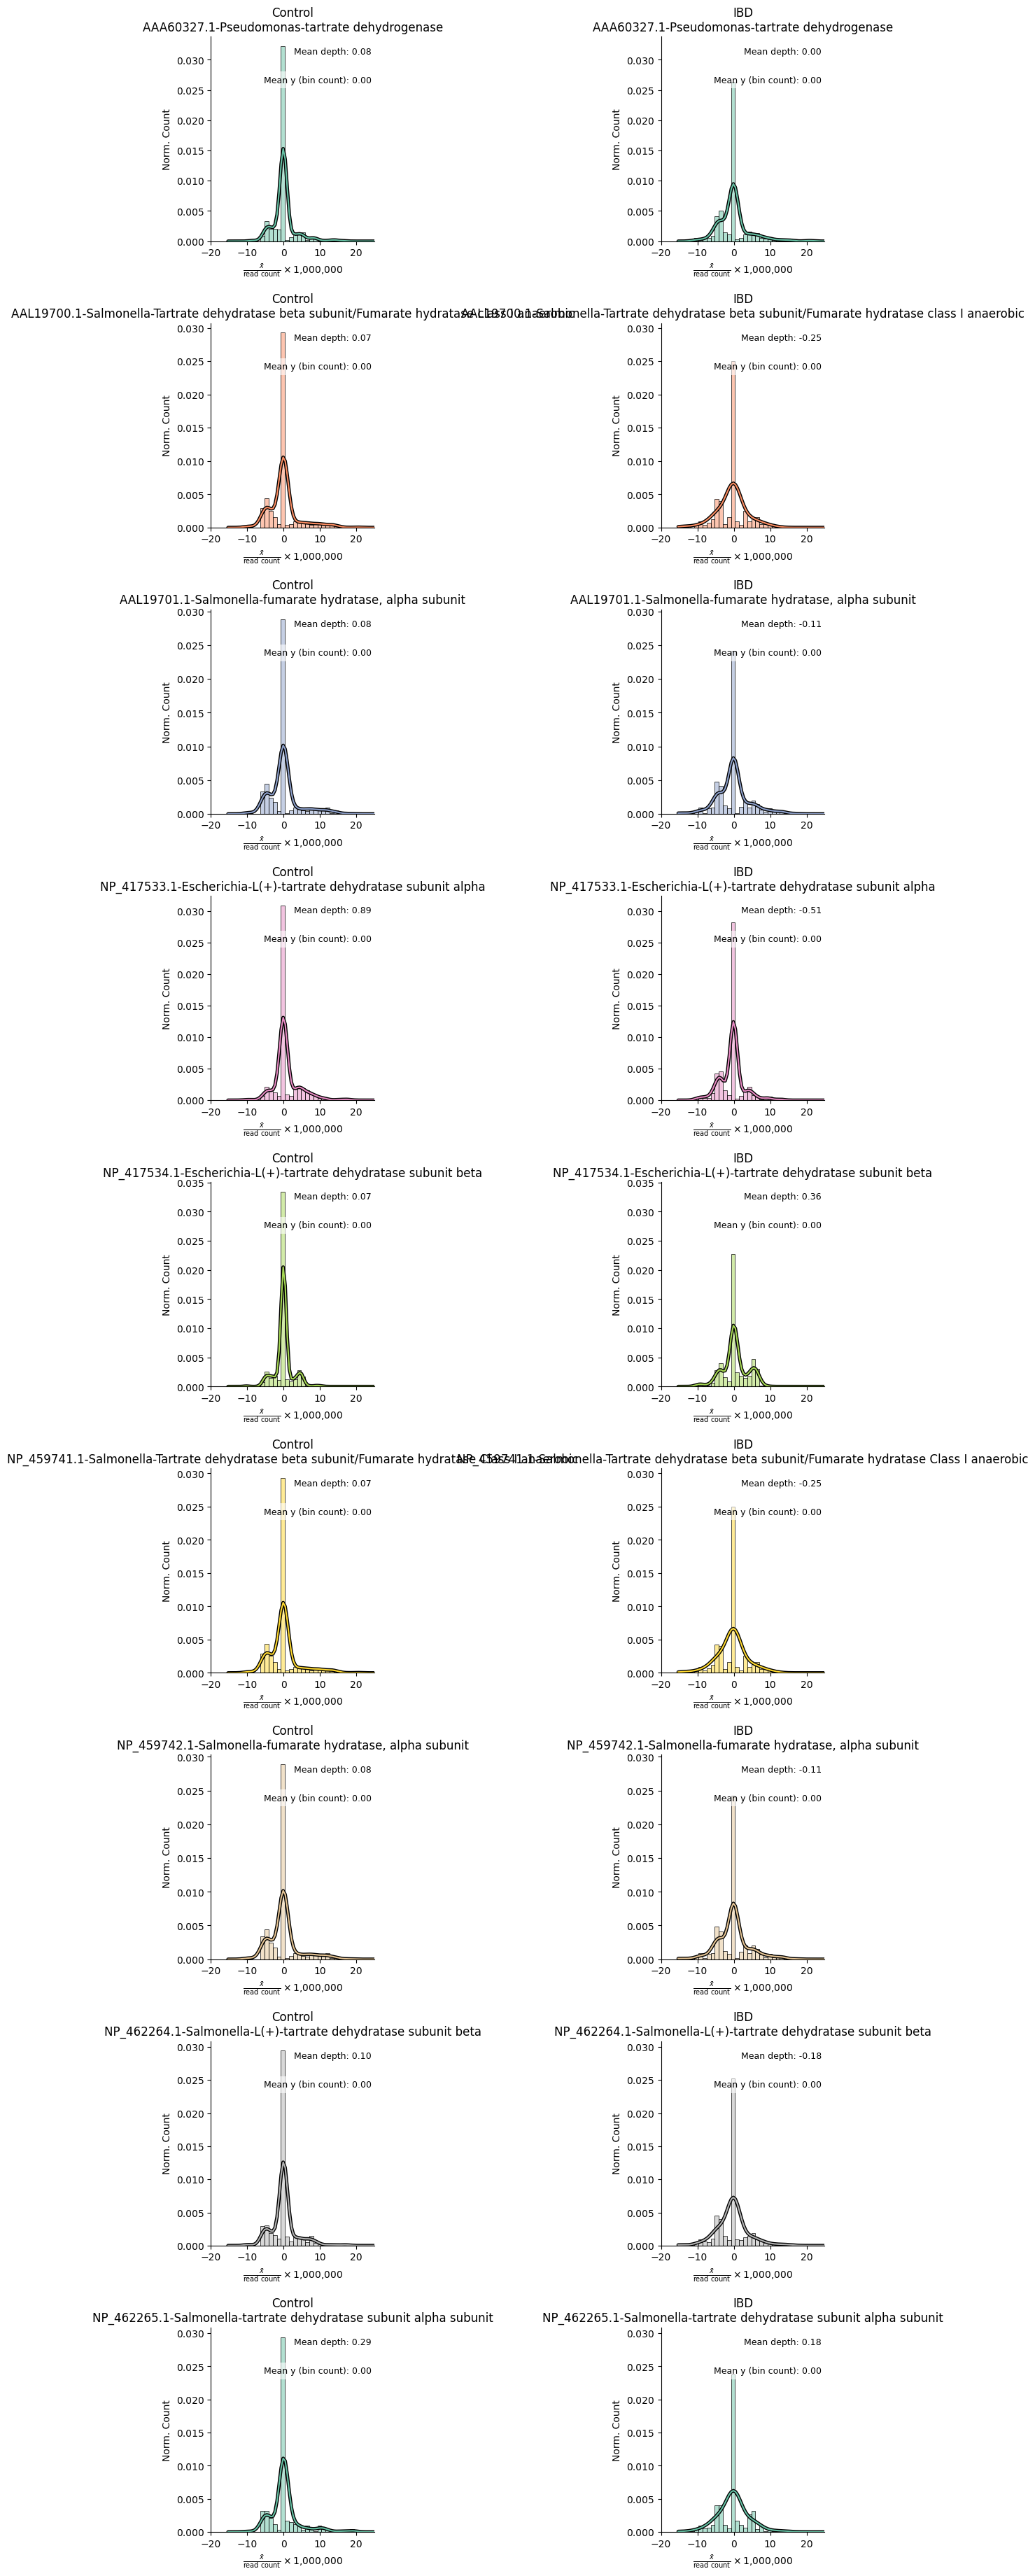

In [102]:
p = sns.displot(
    data=long_table_sub,
    x="log_map_norm_subed",
    hue="name",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    col='diagnosis',
    row='name',
    kde=True,
    stat='density',
    #weights="weight",  # normalize using weights
    facet_kws={'sharey': False, 'sharex': False} # sharex must be false to label the x axis!
)

latex_xlabel = r'$\frac{\bar{x}}{\mathrm{read\ count}} \times 1{,}000{,}000$'
row_names = p.row_names

# Loop through each row and align y-limits
for row_idx, row_name in enumerate(row_names):
    # Get all axes in this row
    axes_row = p.axes[row_idx, :]
    
    # Find max y-limit in this row
    max_ylim = max(ax.get_ylim()[1] for ax in axes_row)
    
    # Set uniform y-limit across this row
    for ax in axes_row:
        ax.set_ylim(top=max_ylim)
        ax.set_ylabel("Norm. Count")
        ax.set_xlim(-20,25)

for ax in p.axes.flatten():
# Iterate over each Axes in the FacetGrid to customize KDE lines and bar edges
#for ax in p.axes.flatten():
    lines = [line for line in ax.lines if line.get_linestyle() == '-']
    
    # For each existing KDE line, add a black thicker line underneath it
    for line in lines:
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # Plot black thicker line underneath
        ax.plot(
            xdata, ydata,
            color='black',
            linewidth=line.get_linewidth() + 2,  # thicker than original
            solid_capstyle='round',
            zorder=line.get_zorder() - 1  # behind original colored line
        )

    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(0.5)

    # Get the bar heights (i.e., counts in each bin)
    bin_counts = [patch.get_height() for patch in ax.patches if patch.get_height() > 0]
    
    # Compute mean of the bin heights (mean y-value)
    mean_con = sum(bin_counts) / len(bin_counts) if bin_counts else 0

#for ax in p.axes.flatten():
    # Get gene and diagnosis from facet title
    title = ax.get_title()
    try:
        name = title.split('|')[0].split('=')[1].strip()
        diagnosis = title.split('|')[1].split('=')[1].strip()
    except IndexError:
        continue  # skip if title parsing fails
    
    # Get the mean value for this facet
    row = mean_depth_sub[(mean_depth_sub['name'] == name) & (mean_depth_sub['diagnosis'] == diagnosis)]
    if not row.empty:
        mean_dep = row['mean_depth'].values[0]
        ax.text(
            0.98, 0.95,
            f"Mean depth: {mean_dep:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )
        ax.text(
            0.98, 0.81,  # Lower position to stack nicely
            f"Mean y (bin count): {mean_con:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )


    ax.set_title(f'{diagnosis}\n{name}')
    ax.tick_params(labelbottom=True)
    ax.set_xlabel(latex_xlabel)

p._legend.remove()
p.fig.subplots_adjust(hspace=0.4, wspace=1.75, bottom=0.20)  # add space for x axis

#plt.savefig('norm_coverage_count_distribution.png', dpi=200, bbox_inches='tight')
plt.show()

In [103]:
long_table_sub_no_zero = long_table_sub[long_table_sub['log_map_norm_subed'] != 0]

In [104]:
mean_depth_sub_no_zero = long_table_sub_no_zero.groupby(['name', 'diagnosis'])['log_map_norm_subed'].mean().reset_index(name='mean_depth')
print(mean_depth_sub_no_zero)

                                                 name diagnosis  mean_depth
0       AAA60327.1-Pseudomonas-tartrate dehydrogenase   Control    0.205603
1       AAA60327.1-Pseudomonas-tartrate dehydrogenase       IBD    0.008631
2   AAL19700.1-Salmonella-Tartrate dehydratase bet...   Control    0.163288
3   AAL19700.1-Salmonella-Tartrate dehydratase bet...       IBD   -0.468240
4   AAL19701.1-Salmonella-fumarate hydratase, alph...   Control    0.192703
5   AAL19701.1-Salmonella-fumarate hydratase, alph...       IBD   -0.197546
6   NP_417533.1-Escherichia-L(+)-tartrate dehydrat...   Control    1.865872
7   NP_417533.1-Escherichia-L(+)-tartrate dehydrat...       IBD   -1.050690
8   NP_417534.1-Escherichia-L(+)-tartrate dehydrat...   Control    0.190267
9   NP_417534.1-Escherichia-L(+)-tartrate dehydrat...       IBD    0.607913
10  NP_459741.1-Salmonella-Tartrate dehydratase be...   Control    0.163288
11  NP_459741.1-Salmonella-Tartrate dehydratase be...       IBD   -0.468240
12  NP_45974

#

The x-axis metric uses the raw read counts that were mapped to the contig which aligned significantly to the gene of interest.

The mapped read count was normalized per sample by the total read counts of the sample: 

$$
r_{read\_norm} = \frac{X}{\mathrm{read\ count}} \times 1{,}000{,}000
$$

And also normalized by the length of the contig:

$$
r_{read\_contig\_norm} = \frac{r_{read\_norm}}{\mathrm{contig\ length}} \times 1{,}000
$$

The total normalized read count was summed for every gene group (g) , either tartrate, $t$ or single copy, $sc$, for the normalized read count for that gene in a sample, $i$,:

$$
\begin{equation}
R_{g, i} = \sum_{j \in G_g} r_{j,i} \quad \text{where } g \in \{t, sc\}
\end{equation}
$$

$$
\begin{equation}
R_{t, i} = \sum_{j \in t} r_{j,i}
\end{equation}
$$

$$
\begin{equation}
R_{sc, i} = \sum_{j \in sc} r_{j,i}
\end{equation}
$$

The log fraction of the sum of the normalized read count mapped was then calculated to report the change in tartrate gene presence as compared to single copy gene presence in sample:

$$
\Delta{gene\ presence} = \frac{\log(R_{t,i})}{\log(R_{sg,i})}
$$

A negative result means there is more single copy gene present in sample.

A positive result mean there is more tartrate gene present in sample.

In [105]:
long_table_sub.groupby(['name', 'diagnosis'])['log_map_norm_subed'].count()

name                                                                                           diagnosis
AAA60327.1-Pseudomonas-tartrate dehydrogenase                                                  Control      372
                                                                                               IBD          372
AAL19700.1-Salmonella-Tartrate dehydratase beta subunit/Fumarate hydratase class I anaerobic   Control      372
                                                                                               IBD          372
AAL19701.1-Salmonella-fumarate hydratase, alpha subunit                                        Control      372
                                                                                               IBD          372
NP_417533.1-Escherichia-L(+)-tartrate dehydratase subunit alpha                                Control      372
                                                                                               IBD          372

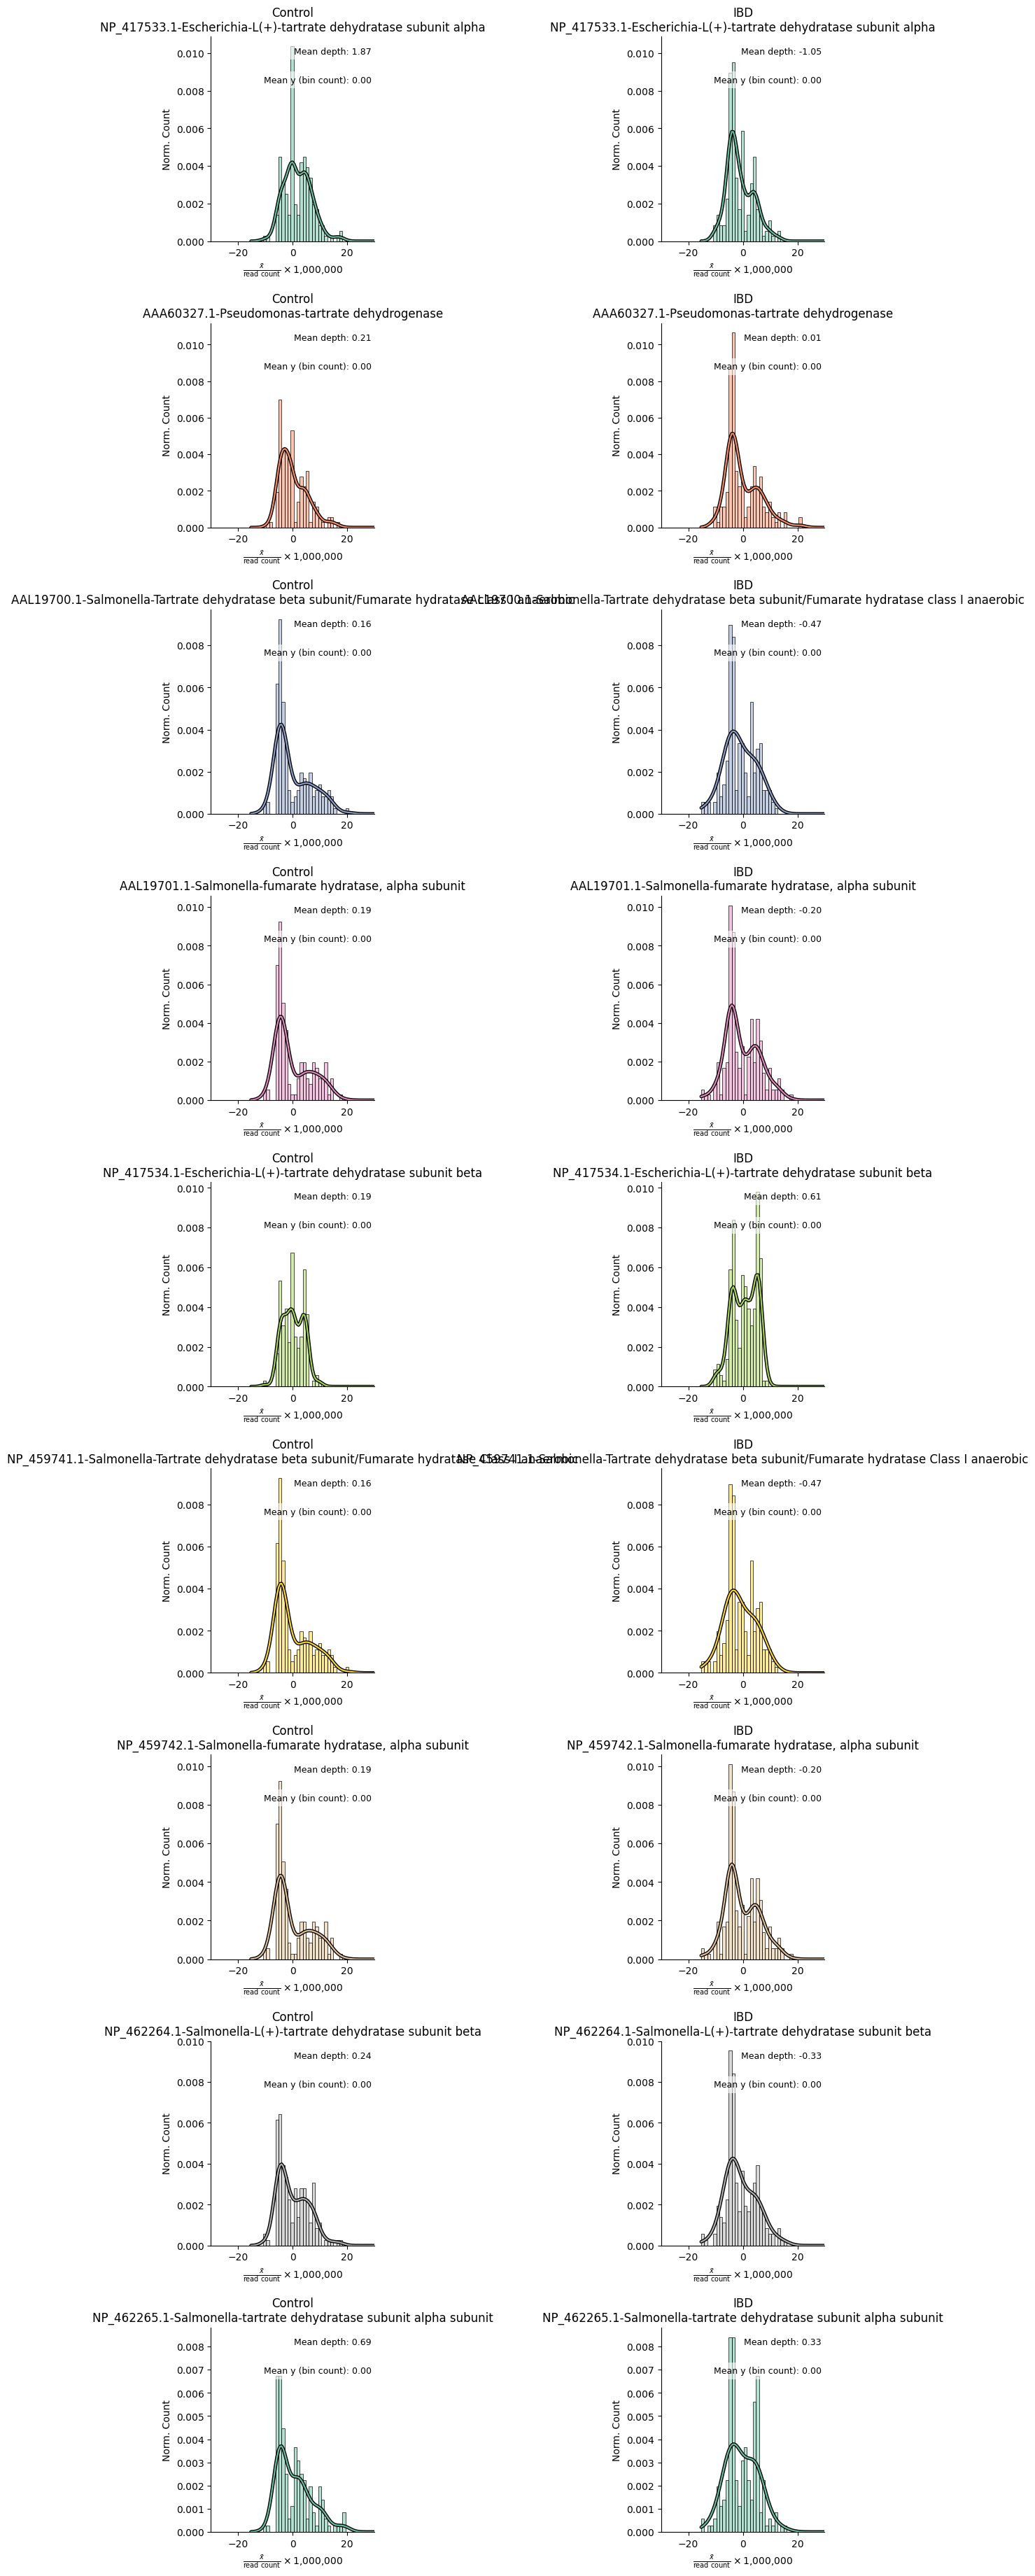

In [106]:
p = sns.displot(
    data=long_table_sub_no_zero,
    x="log_map_norm_subed",
    hue="name",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    col='diagnosis',
    row='name',
    kde=True,
    stat='density',
    #weights="weight",  # normalize using weights
    facet_kws={'sharey': False, 'sharex': False} # sharex must be false to label the x axis!
)

latex_xlabel = r'$\frac{\bar{x}}{\mathrm{read\ count}} \times 1{,}000{,}000$'
row_names = p.row_names

# Loop through each row and align y-limits
for row_idx, row_name in enumerate(row_names):
    # Get all axes in this row
    axes_row = p.axes[row_idx, :]
    
    # Find max y-limit in this row
    max_ylim = max(ax.get_ylim()[1] for ax in axes_row)
    
    # Set uniform y-limit across this row
    for ax in axes_row:
        ax.set_ylim(top=max_ylim)
        ax.set_ylabel("Norm. Count")
        ax.set_xlim(-30,30)

for ax in p.axes.flatten():
# Iterate over each Axes in the FacetGrid to customize KDE lines and bar edges
#for ax in p.axes.flatten():
    lines = [line for line in ax.lines if line.get_linestyle() == '-']
    
    # For each existing KDE line, add a black thicker line underneath it
    for line in lines:
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # Plot black thicker line underneath
        ax.plot(
            xdata, ydata,
            color='black',
            linewidth=line.get_linewidth() + 2,  # thicker than original
            solid_capstyle='round',
            zorder=line.get_zorder() - 1  # behind original colored line
        )

    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(0.5)

    # Get the bar heights (i.e., counts in each bin)
    bin_counts = [patch.get_height() for patch in ax.patches if patch.get_height() > 0]
    
    # Compute mean of the bin heights (mean y-value)
    mean_con = sum(bin_counts) / len(bin_counts) if bin_counts else 0

#for ax in p.axes.flatten():
    # Get gene and diagnosis from facet title
    title = ax.get_title()
    try:
        name = title.split('|')[0].split('=')[1].strip()
        diagnosis = title.split('|')[1].split('=')[1].strip()
    except IndexError:
        continue  # skip if title parsing fails
    
    # Get the mean value for this facet
    row = mean_depth_sub_no_zero[(mean_depth_sub_no_zero['name'] == name) & (mean_depth_sub_no_zero['diagnosis'] == diagnosis)]
    if not row.empty:
        mean_dep = row['mean_depth'].values[0]
        ax.text(
            0.98, 0.95,
            f"Mean depth: {mean_dep:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )
        ax.text(
            0.98, 0.81,  # Lower position to stack nicely
            f"Mean y (bin count): {mean_con:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )


    ax.set_title(f'{diagnosis}\n{name}')
    ax.tick_params(labelbottom=True)
    ax.set_xlabel(latex_xlabel)

p._legend.remove()
p.fig.subplots_adjust(hspace=0.4, wspace=1.75, bottom=0.20)  # add space for x axis

#plt.savefig('norm_coverage_count_distribution.png', dpi=200, bbox_inches='tight')
plt.show()

In [107]:
hd = long_table_sub.pivot_table(index="run", columns="name", values="log_map_norm_subed")

In [108]:
hd

name,AAA60327.1-Pseudomonas-tartrate dehydrogenase,AAL19700.1-Salmonella-Tartrate dehydratase beta subunit/Fumarate hydratase class I anaerobic,"AAL19701.1-Salmonella-fumarate hydratase, alpha subunit",NP_417533.1-Escherichia-L(+)-tartrate dehydratase subunit alpha,NP_417534.1-Escherichia-L(+)-tartrate dehydratase subunit beta,NP_459741.1-Salmonella-Tartrate dehydratase beta subunit/Fumarate hydratase Class I anaerobic,"NP_459742.1-Salmonella-fumarate hydratase, alpha subunit",NP_462264.1-Salmonella-L(+)-tartrate dehydratase subunit beta,NP_462265.1-Salmonella-tartrate dehydratase subunit alpha subunit
run,,,,,,,,,
ERR011087,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
ERR011088,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
ERR011089,0.000000,0.000000,0.000000,6.308878,0.0,0.000000,0.000000,0.000000,0.000000
ERR011090,0.000000,0.000000,0.000000,5.939693,0.0,0.000000,0.000000,0.000000,0.000000
ERR011091,0.000000,0.000000,0.000000,6.170582,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
SRR6468712,8.784803,0.000000,7.723476,0.000000,0.0,0.000000,7.723476,0.000000,0.000000
SRR6468714,15.395613,10.453402,3.601066,3.644177,0.0,10.453402,3.601066,3.816629,4.493498
SRR6468715,9.539894,6.053411,5.980236,5.191183,0.0,6.053411,5.980236,2.325191,5.839840


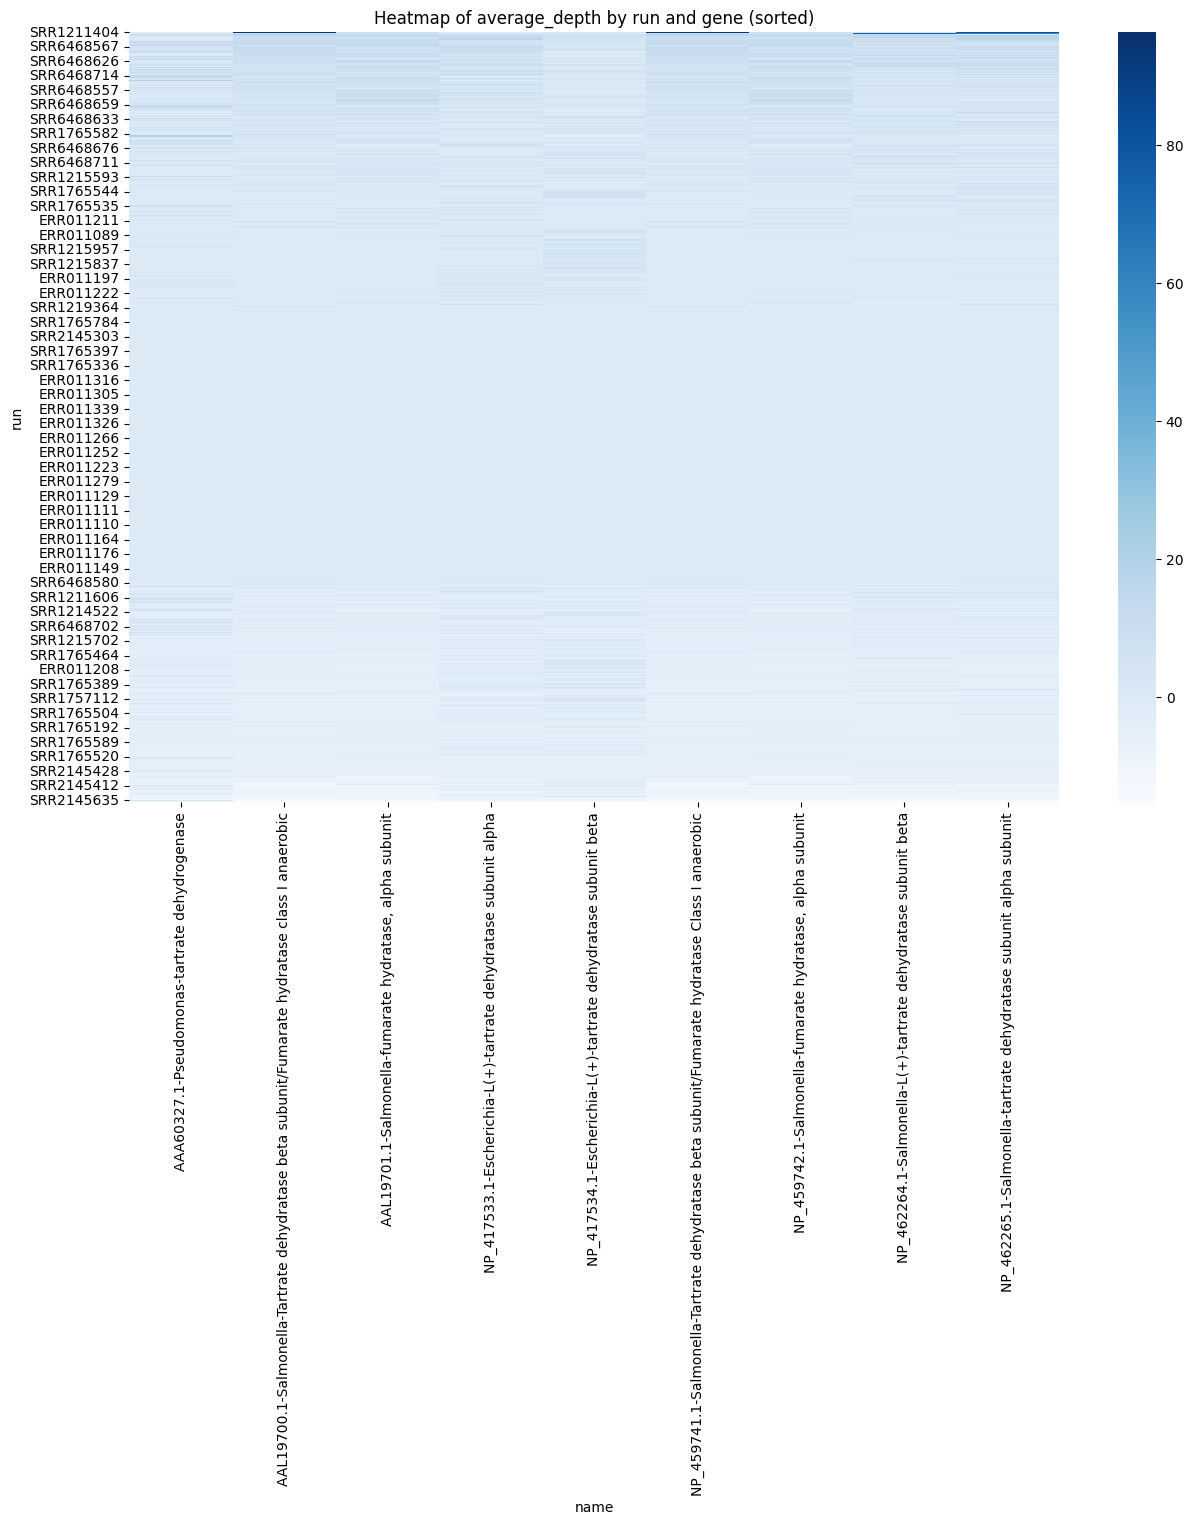

In [109]:
# Sort by row means to get some order
hd_sorted = hd.loc[hd.mean(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(15,10))
sns.heatmap(hd_sorted, cmap='Blues')
plt.title("Heatmap of average_depth by run and gene (sorted)")
plt.show()

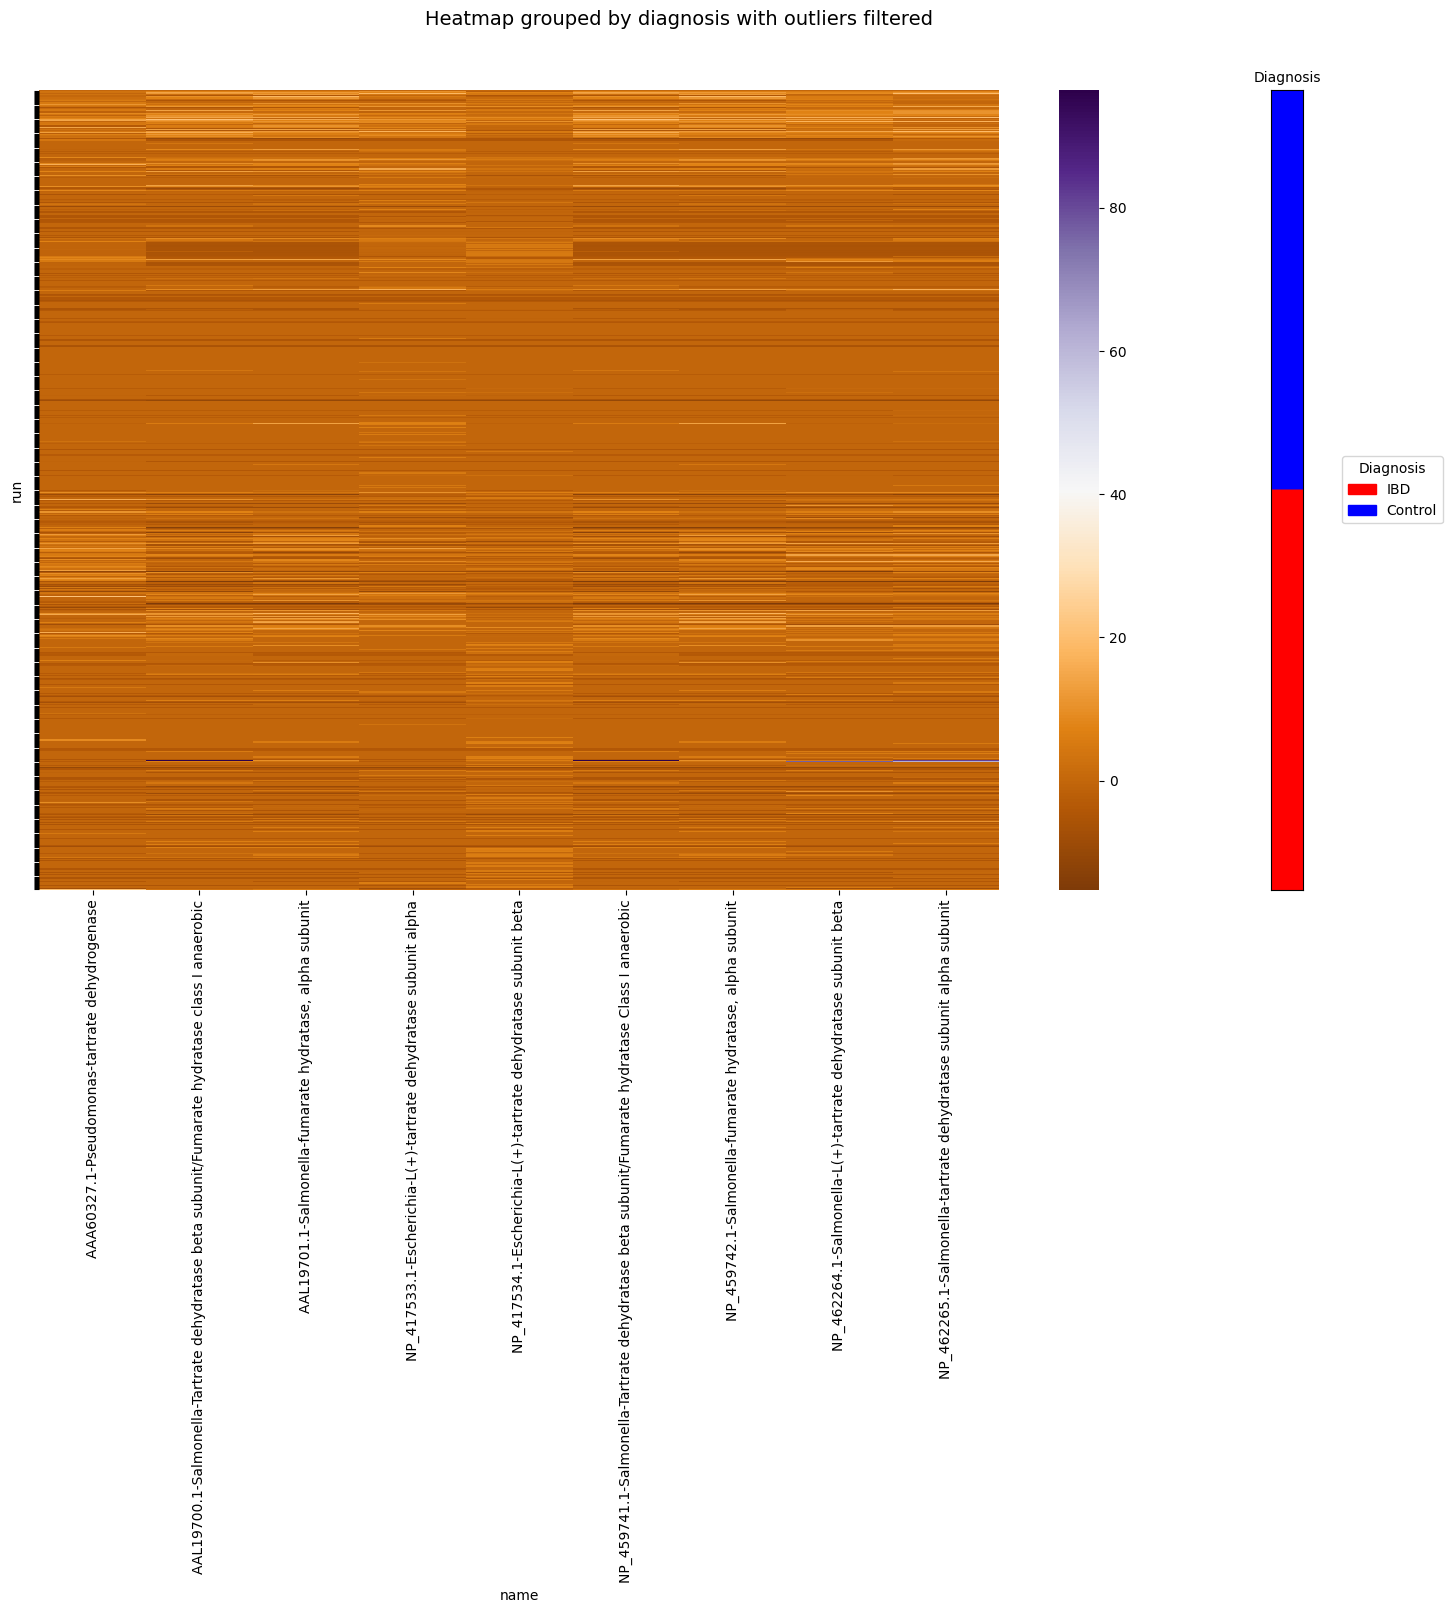

In [110]:
###### filter with the `filtered_df` dataframe or full heatmap with df_simple
hd = long_table_sub.pivot_table(index="run", columns="name", values="log_map_norm_subed")
######

# Diagnosis lookup
run_to_diag = df_simple.groupby('run')['diagnosis'].first()
diag_for_runs = run_to_diag.loc[hd.index]

# Sort by diagnosis first, then by row mean within each group
sorted_runs = diag_for_runs.sort_values().index
hd_sorted = hd.loc[sorted_runs]
diagnosis_sorted = diag_for_runs.loc[sorted_runs]

# Create a palette and color array
palette = {'IBD': 'red', 'Control': 'blue'}
diagnosis_colors = diagnosis_sorted.map(palette)
rgb_colors = [mcolors.to_rgb(c) for c in diagnosis_colors]

# === Plot heatmap + side diagnosis color bar ===
fig = plt.figure(figsize=(16, 10))

# Heatmap axis
ax1 = fig.add_axes([0.1, 0.1, 0.75, 0.8])
sns.heatmap(hd_sorted, cmap='PuOr', ax=ax1, cbar=True)
ax1.set_yticks(np.arange(len(hd_sorted)) + 0.5)
ax1.set_yticklabels([])

# Color bar axis for diagnosis strip
ax2 = fig.add_axes([0.87, 0.1, 0.02, 0.8])
color_matrix = np.array(rgb_colors).reshape(-1, 1, 3)
ax2.imshow(color_matrix, aspect='auto')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Diagnosis", fontsize=10)

# Add legend manually
handles = [mpatches.Patch(color=c, label=l) for l, c in palette.items()]
fig.legend(handles=handles, title="Diagnosis", loc="center left", bbox_to_anchor=(0.91, 0.5))

plt.suptitle("Heatmap grouped by diagnosis with outliers filtered", fontsize=14)

plt.savefig('coverage_heatmap_filtered_outliers.png', dpi=300, bbox_inches='tight')

plt.show()

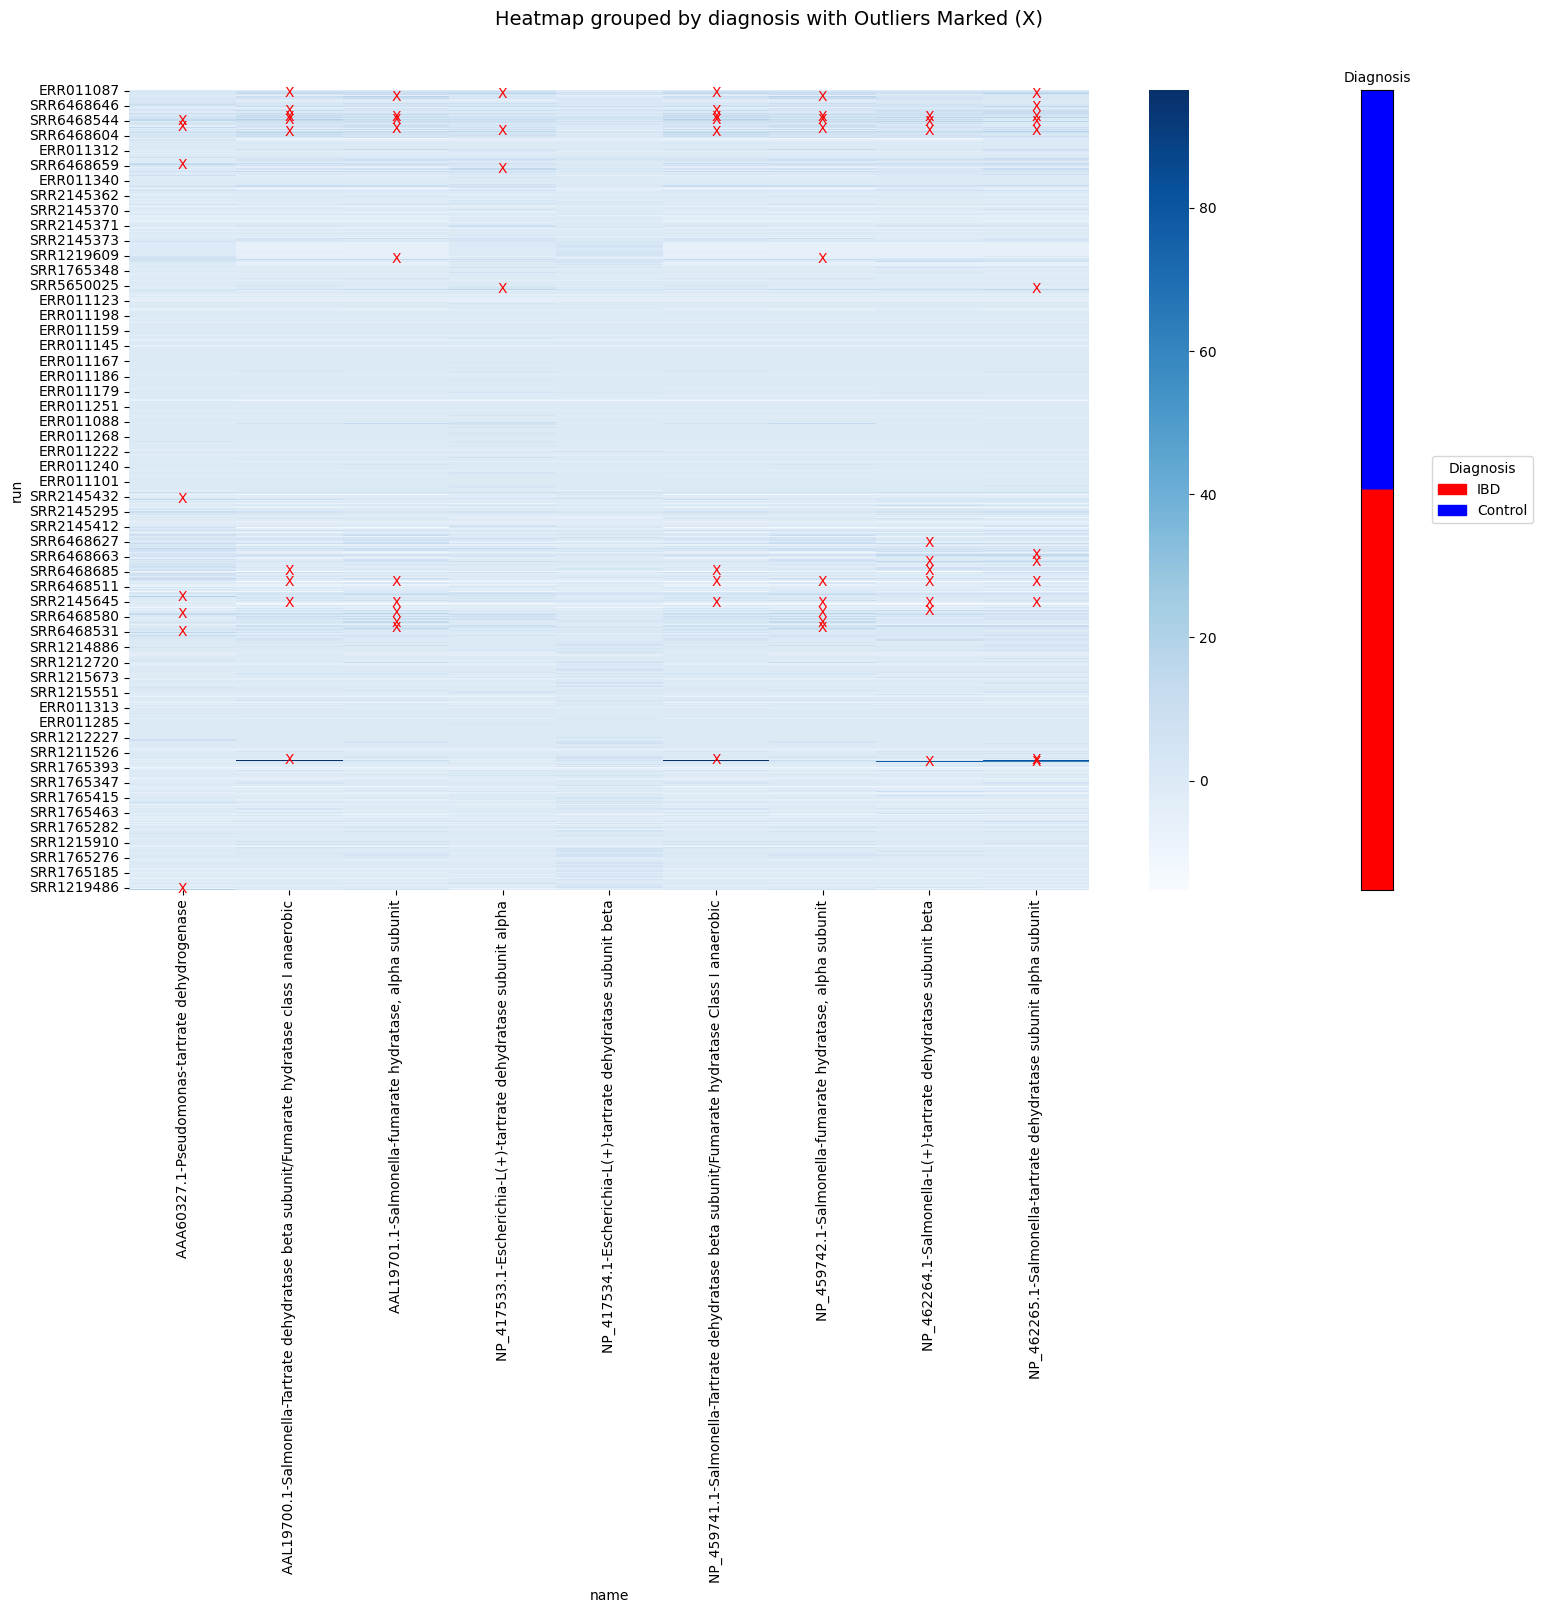

In [112]:
mean_val = long_table_sub['log_map_norm_subed'].mean()
std_val = long_table_sub['log_map_norm_subed'].std()

lower_bound = mean_val - 3 * std_val
upper_bound = mean_val + 3 * std_val

#df_simple_filter_outlierless = df_simple_filter[(df_simple_filter['average_depth'] >= lower_bound) & (df_simple_filter['average_depth'] <= upper_bound)]

outlier_mask = (hd_sorted < lower_bound) | (hd_sorted > upper_bound)

diagnosis_colors = diagnosis_sorted.map(palette)
rgb_colors = [mcolors.to_rgb(c) for c in diagnosis_colors]

fig = plt.figure(figsize=(16, 10))

ax = fig.add_axes([0.1, 0.1, 0.75, 0.8])
sns.heatmap(hd_sorted, cmap='Blues', ax=ax, cbar=True)

for y in range(hd_sorted.shape[0]):
    for x in range(hd_sorted.shape[1]):
        if outlier_mask.iloc[y, x]:
            ax.text(x + 0.5, y + 0.5, 'X', ha='center', va='center', color='red', fontsize=10)

ax2 = fig.add_axes([0.87, 0.1, 0.02, 0.8])
color_matrix = np.array(rgb_colors).reshape(-1, 1, 3)
ax2.imshow(color_matrix, aspect='auto')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Diagnosis", fontsize=10)

handles = [mpatches.Patch(color=c, label=l) for l, c in palette.items()]
fig.legend(handles=handles, title="Diagnosis", loc="center left", bbox_to_anchor=(0.91, 0.5))

plt.suptitle("Heatmap grouped by diagnosis with Outliers Marked (X)", fontsize=14)

#plt.savefig('coverage_heatmap_full_marked_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

In [113]:
outlier_mask[outlier_mask.any(axis=1)]

name,AAA60327.1-Pseudomonas-tartrate dehydrogenase,AAL19700.1-Salmonella-Tartrate dehydratase beta subunit/Fumarate hydratase class I anaerobic,"AAL19701.1-Salmonella-fumarate hydratase, alpha subunit",NP_417533.1-Escherichia-L(+)-tartrate dehydratase subunit alpha,NP_417534.1-Escherichia-L(+)-tartrate dehydratase subunit beta,NP_459741.1-Salmonella-Tartrate dehydratase beta subunit/Fumarate hydratase Class I anaerobic,"NP_459742.1-Salmonella-fumarate hydratase, alpha subunit",NP_462264.1-Salmonella-L(+)-tartrate dehydratase subunit beta,NP_462265.1-Salmonella-tartrate dehydratase subunit alpha subunit
run,,,,,,,,,
SRR6468621,False,True,False,False,False,True,False,False,False
SRR6468622,False,False,False,True,False,False,False,False,True
SRR6468626,False,False,True,False,False,False,True,False,False
SRR6468647,False,False,False,False,False,False,False,False,True
SRR6468650,False,True,False,False,False,True,False,False,False
SRR6468541,False,True,True,False,False,True,True,True,True
SRR6468543,False,True,True,False,False,True,True,False,False
SRR6468544,True,False,False,False,False,False,False,False,False
SRR6468545,False,False,False,False,False,False,False,True,True


In [117]:
outlier_upper_mask = hd_sorted > upper_bound
outlier_lower_mask = hd_sorted < lower_bound

In [119]:
upper_outliers = hd_sorted[outlier_upper_mask]
lower_outliers = hd_sorted[outlier_lower_mask]

In [121]:
upper_outliers[upper_outliers.any(axis=1)]

name,AAA60327.1-Pseudomonas-tartrate dehydrogenase,AAL19700.1-Salmonella-Tartrate dehydratase beta subunit/Fumarate hydratase class I anaerobic,"AAL19701.1-Salmonella-fumarate hydratase, alpha subunit",NP_417533.1-Escherichia-L(+)-tartrate dehydratase subunit alpha,NP_417534.1-Escherichia-L(+)-tartrate dehydratase subunit beta,NP_459741.1-Salmonella-Tartrate dehydratase beta subunit/Fumarate hydratase Class I anaerobic,"NP_459742.1-Salmonella-fumarate hydratase, alpha subunit",NP_462264.1-Salmonella-L(+)-tartrate dehydratase subunit beta,NP_462265.1-Salmonella-tartrate dehydratase subunit alpha subunit
run,,,,,,,,,
SRR6468621,NaN,14.215551,NaN,NaN,NaN,14.215551,NaN,NaN,NaN
SRR6468622,NaN,NaN,NaN,17.928781,NaN,NaN,NaN,NaN,19.241947
SRR6468626,NaN,NaN,17.925457,NaN,NaN,NaN,17.925457,NaN,NaN
SRR6468647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.193080
SRR6468650,NaN,13.804969,NaN,NaN,NaN,13.804969,NaN,NaN,NaN
SRR6468541,NaN,14.301608,14.831340,NaN,NaN,14.301608,14.831340,16.555166,19.316576
SRR6468543,NaN,20.251811,14.740459,NaN,NaN,20.251811,14.740459,NaN,NaN
SRR6468544,14.645824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR6468545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.440200,17.457221


In [122]:
lower_outliers[lower_outliers.any(axis=1)]

name,AAA60327.1-Pseudomonas-tartrate dehydrogenase,AAL19700.1-Salmonella-Tartrate dehydratase beta subunit/Fumarate hydratase class I anaerobic,"AAL19701.1-Salmonella-fumarate hydratase, alpha subunit",NP_417533.1-Escherichia-L(+)-tartrate dehydratase subunit alpha,NP_417534.1-Escherichia-L(+)-tartrate dehydratase subunit beta,NP_459741.1-Salmonella-Tartrate dehydratase beta subunit/Fumarate hydratase Class I anaerobic,"NP_459742.1-Salmonella-fumarate hydratase, alpha subunit",NP_462264.1-Salmonella-L(+)-tartrate dehydratase subunit beta,NP_462265.1-Salmonella-tartrate dehydratase subunit alpha subunit
run,,,,,,,,,
SRR6468694,NaN,-14.040178,NaN,NaN,NaN,-14.040178,NaN,-14.040178,NaN
SRR6468667,NaN,-15.273991,-15.273991,NaN,NaN,-15.273991,-15.273991,-15.273991,-15.273991
SRR2145635,NaN,-15.224044,-15.224044,NaN,NaN,-15.224044,-15.224044,-15.224044,-15.224044
